#  Proyecto 1

##### Gladys Andrea Rodríguez Guerrero  -  20006107

### Librerías a utilizar

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

### Carga de Dataset

In [2]:
data = pd.read_csv('dataP.csv')

print(str(data.shape) + '\n')

data.head()

(307511, 122)



,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
# eliminando columna ID

data.drop('SK_ID_CURR', axis=1, inplace=True)

print(str(data.shape))

(307511, 121)


### Análisis de Datos (toma de decisiones)

##### * Análisis del Taget

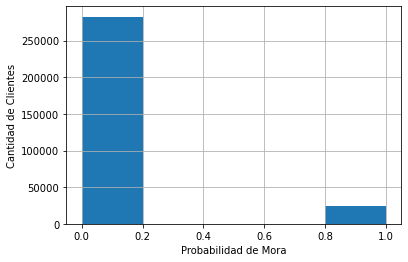

In [4]:
data['TARGET'].hist(bins=5, density=False)
plt.xlabel("Probabilidad de Mora")
plt.ylabel("Cantidad de Clientes")
plt.show()

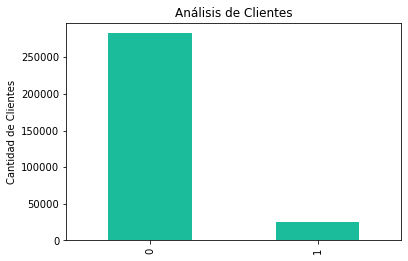

In [5]:
data['TARGET'].value_counts().plot(kind='bar', color = '#1ABC9C')
plt.title('Análisis de Clientes')
plt.ylabel("Cantidad de Clientes")
plt.show()

##### * Análisis de tipo de variables en X

In [6]:
data.dtypes

TARGET                          int64
NAME_CONTRACT_TYPE             object
CODE_GENDER                    object
FLAG_OWN_CAR                   object
FLAG_OWN_REALTY                object
                               ...   
AMT_REQ_CREDIT_BUREAU_DAY     float64
AMT_REQ_CREDIT_BUREAU_WEEK    float64
AMT_REQ_CREDIT_BUREAU_MON     float64
AMT_REQ_CREDIT_BUREAU_QRT     float64
AMT_REQ_CREDIT_BUREAU_YEAR    float64
Length: 121, dtype: object

In [7]:
cat_vars = [var for var in data.columns if data[var].dtype == 'O']
#cat_vars

#Agregamos variables que por definición son categóricas
cat_vars = cat_vars + ['FLAG_MOBIL'] + ['FLAG_EMP_PHONE'] + ['FLAG_WORK_PHONE'] + ['FLAG_CONT_MOBILE'] + ['FLAG_PHONE'] + ['FLAG_EMAIL']
#cat_vars

# Cantidad de variables categóricas
len(cat_vars)

22

In [8]:
#Forzandoa a todas las variables de la lista como categóticas
data[cat_vars] = data[cat_vars].astype('O')

In [9]:
num_vars = [var for var in data.columns if(var not in cat_vars and var != 'TARGET')]
#num_vars

In [10]:
len(num_vars)

98

##### * Análisis de Valores Faltantes

In [11]:
var_with_na = [var for var in data.columns if(data[var].isnull().sum() > 0)]
len(var_with_na)

67

In [12]:
# Proporcion de NA en cada variable
data[var_with_na].isnull().mean().sort_values(ascending=False)

COMMONAREA_MEDI             0.698723
COMMONAREA_AVG              0.698723
COMMONAREA_MODE             0.698723
NONLIVINGAPARTMENTS_AVG     0.694330
NONLIVINGAPARTMENTS_MODE    0.694330
                              ...   
EXT_SOURCE_2                0.002146
AMT_GOODS_PRICE             0.000904
AMT_ANNUITY                 0.000039
CNT_FAM_MEMBERS             0.000007
DAYS_LAST_PHONE_CHANGE      0.000003
Length: 67, dtype: float64

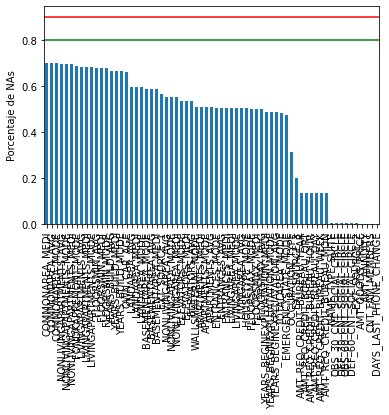

In [13]:
#graficamos porcentajes de NAs.
data[var_with_na].isnull().mean().sort_values(ascending=False).plot.bar()
plt.ylabel("Porcentaje de NAs")
plt.axhline(y=0.9, color="r")
plt.axhline(y=0.8, color="g")
plt.show()

In [14]:
# variables categóricas con NA
cat_na = [var for var in cat_vars if var in var_with_na]
cat_na

['NAME_TYPE_SUITE',
 'OCCUPATION_TYPE',
 'FONDKAPREMONT_MODE',
 'HOUSETYPE_MODE',
 'WALLSMATERIAL_MODE',
 'EMERGENCYSTATE_MODE']

In [15]:
# variables numéricas con NA
num_na = [var for var in num_vars if var in var_with_na]
num_na

['AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'OWN_CAR_AGE',
 'CNT_FAM_MEMBERS',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'APARTMENTS_AVG',
 'BASEMENTAREA_AVG',
 'YEARS_BEGINEXPLUATATION_AVG',
 'YEARS_BUILD_AVG',
 'COMMONAREA_AVG',
 'ELEVATORS_AVG',
 'ENTRANCES_AVG',
 'FLOORSMAX_AVG',
 'FLOORSMIN_AVG',
 'LANDAREA_AVG',
 'LIVINGAPARTMENTS_AVG',
 'LIVINGAREA_AVG',
 'NONLIVINGAPARTMENTS_AVG',
 'NONLIVINGAREA_AVG',
 'APARTMENTS_MODE',
 'BASEMENTAREA_MODE',
 'YEARS_BEGINEXPLUATATION_MODE',
 'YEARS_BUILD_MODE',
 'COMMONAREA_MODE',
 'ELEVATORS_MODE',
 'ENTRANCES_MODE',
 'FLOORSMAX_MODE',
 'FLOORSMIN_MODE',
 'LANDAREA_MODE',
 'LIVINGAPARTMENTS_MODE',
 'LIVINGAREA_MODE',
 'NONLIVINGAPARTMENTS_MODE',
 'NONLIVINGAREA_MODE',
 'APARTMENTS_MEDI',
 'BASEMENTAREA_MEDI',
 'YEARS_BEGINEXPLUATATION_MEDI',
 'YEARS_BUILD_MEDI',
 'COMMONAREA_MEDI',
 'ELEVATORS_MEDI',
 'ENTRANCES_MEDI',
 'FLOORSMAX_MEDI',
 'FLOORSMIN_MEDI',
 'LANDAREA_MEDI',
 'LIVINGAPARTMENTS_MEDI',
 'LIVINGAREA_MEDI',
 'NONLIVINGAPARTMEN

In [16]:
print("{} variables numéricas con NA".format(len(num_na)))
print("{} variables categóticas con NA".format(len(cat_na)))

61 variables numéricas con NA
6 variables categóticas con NA


##### * Verificación del impacto del NA contra el Target

In [17]:
def na_impact_over_target(df, Xvar, Yvar):
    df = data.copy()
    df[Xvar] = np.where(df[Xvar].isnull(), 1, 0)
    temp = df.groupby(Xvar)[Yvar].agg(['mean', 'std'])
    temp.plot(kind="barh", y="mean", xerr="std", legend=False, title=Yvar)
    plt.show()

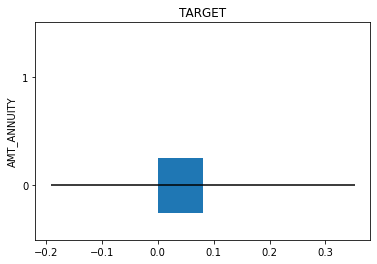

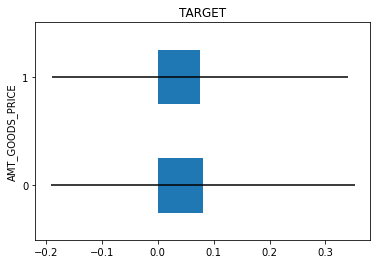

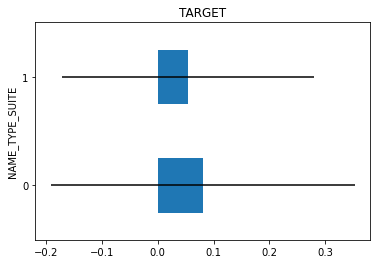

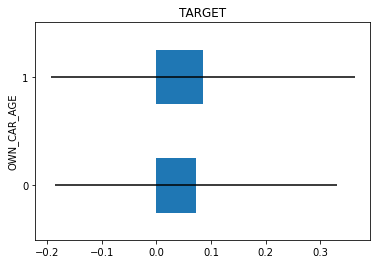

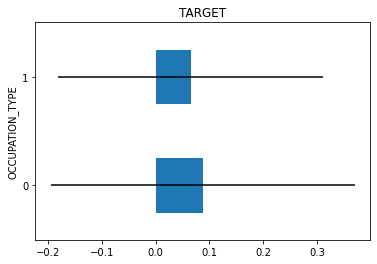

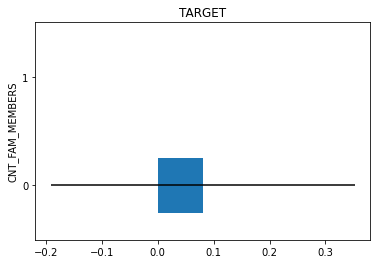

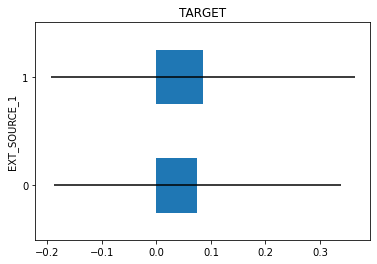

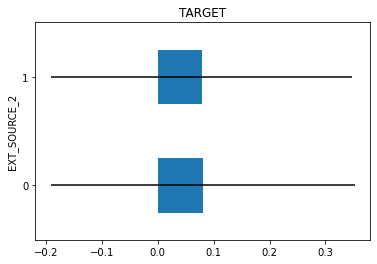

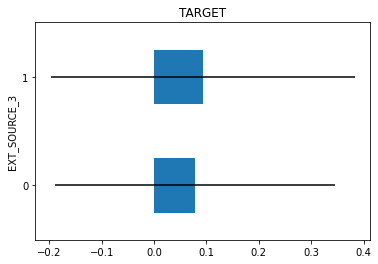

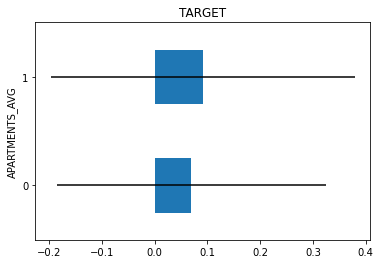

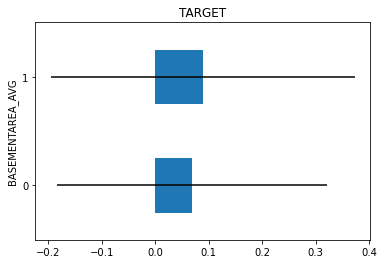

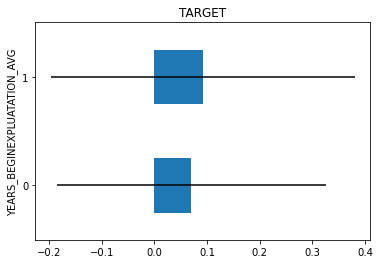

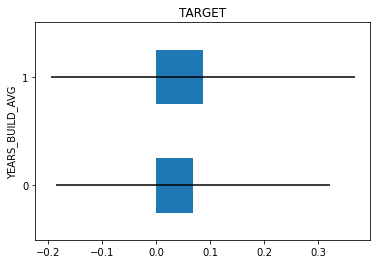

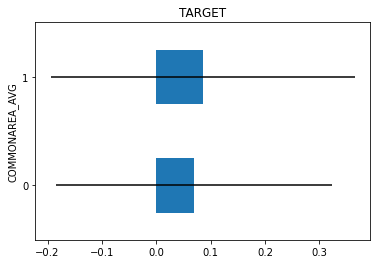

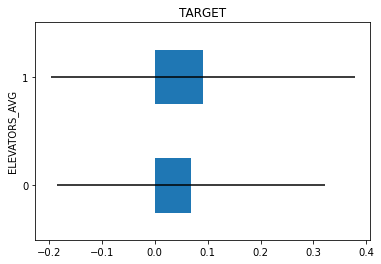

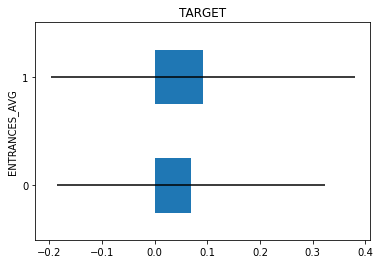

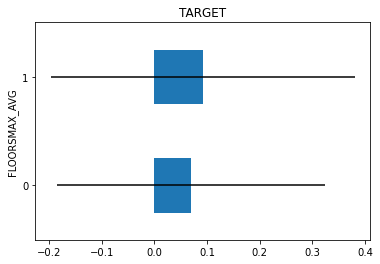

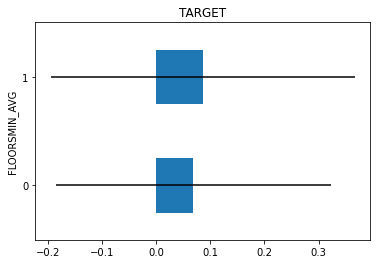

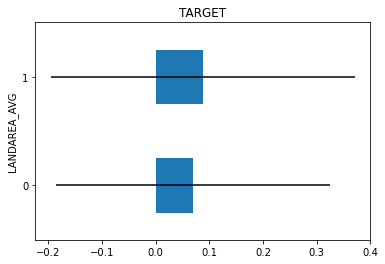

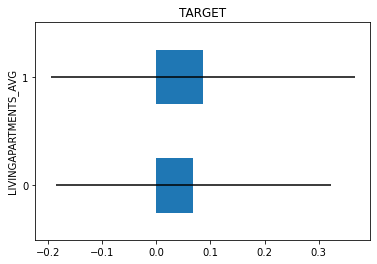

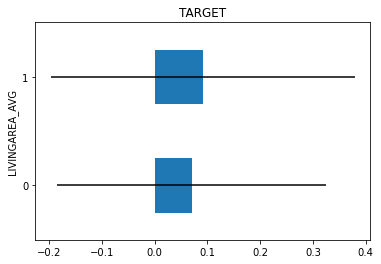

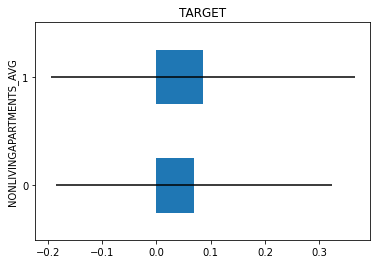

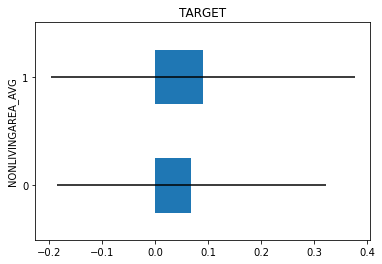

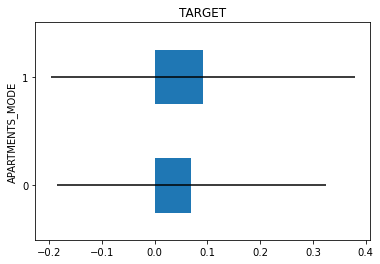

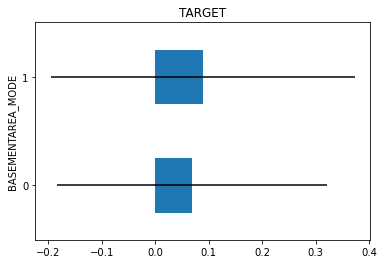

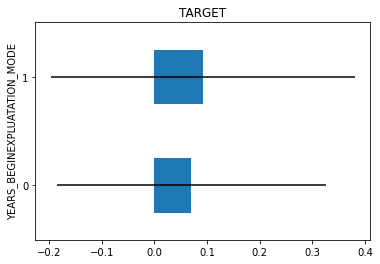

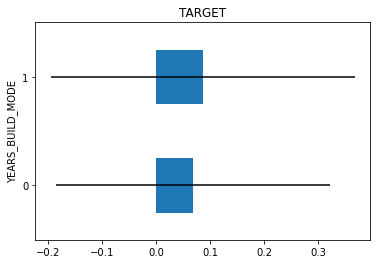

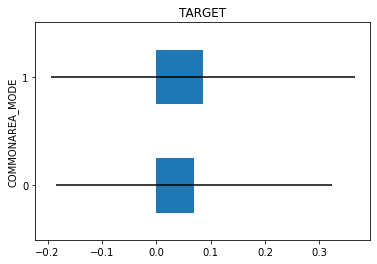

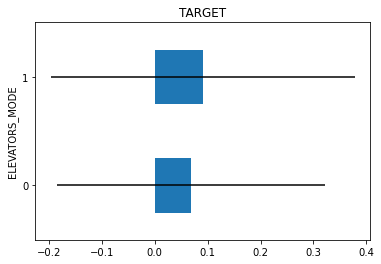

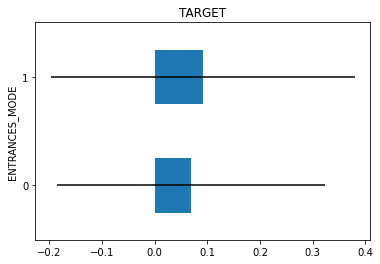

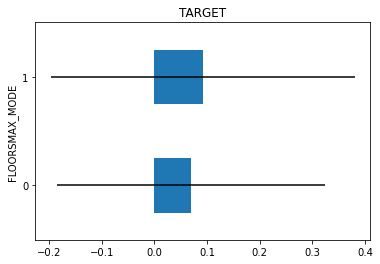

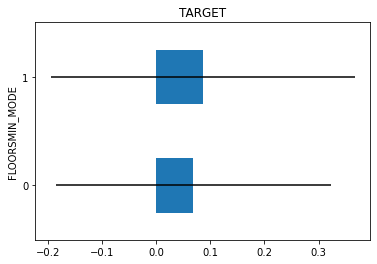

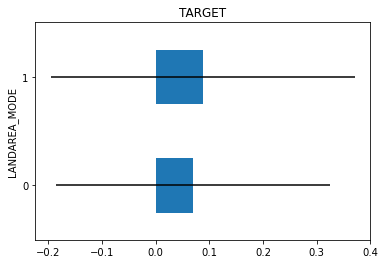

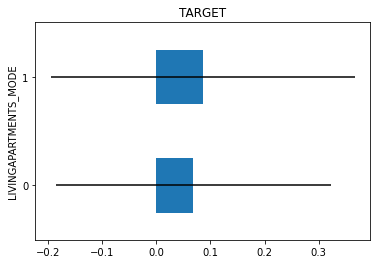

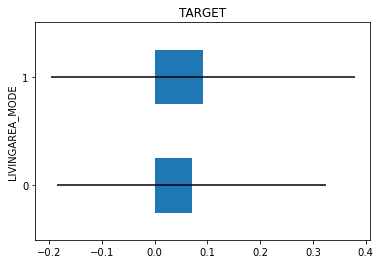

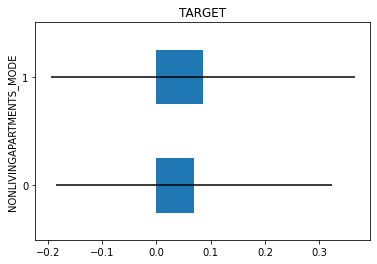

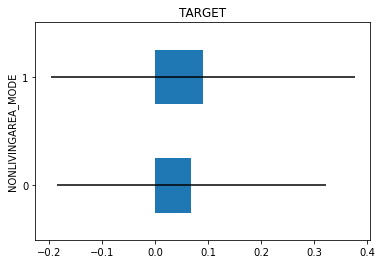

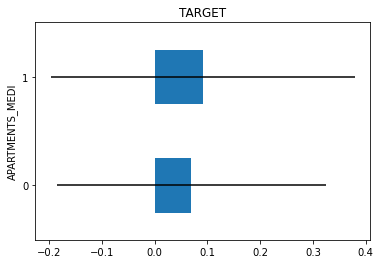

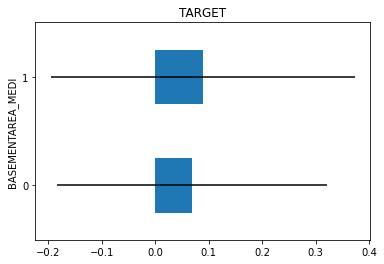

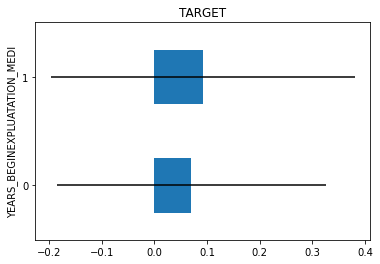

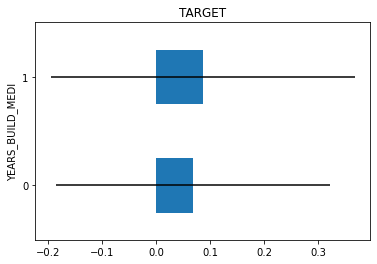

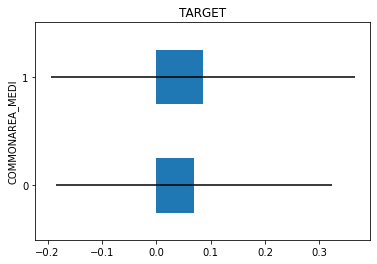

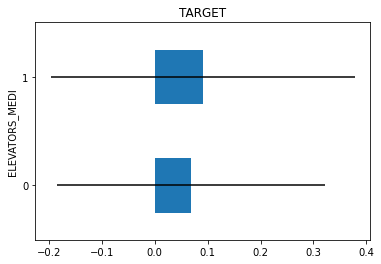

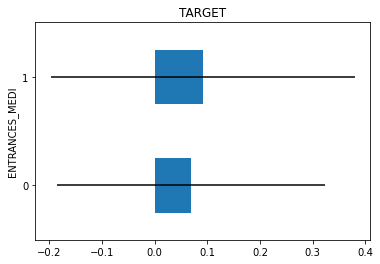

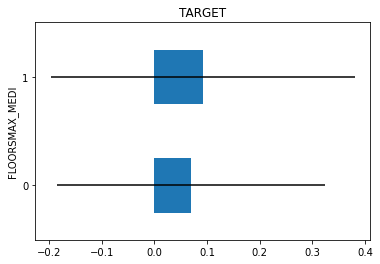

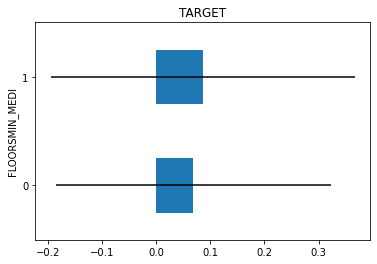

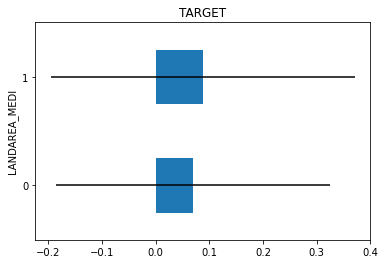

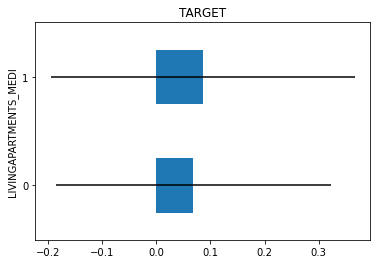

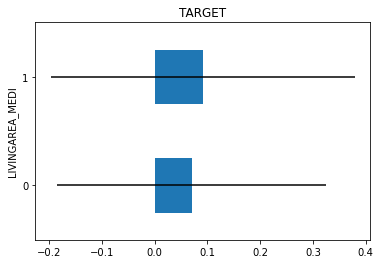

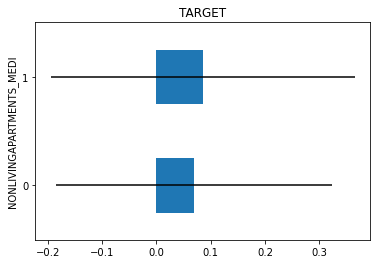

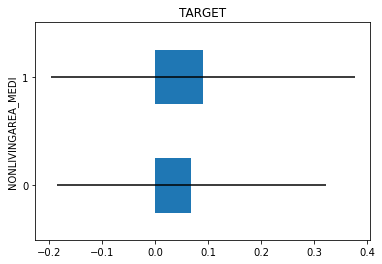

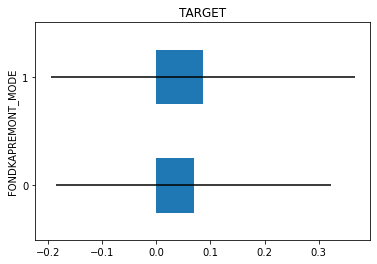

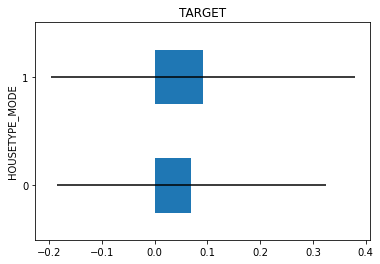

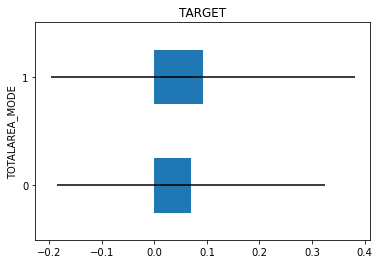

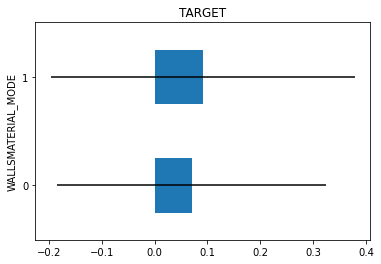

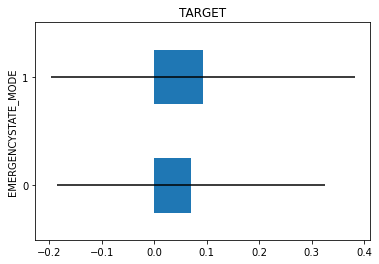

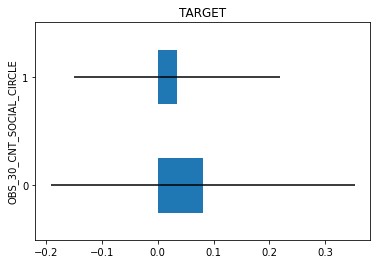

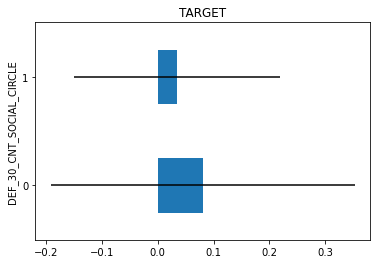

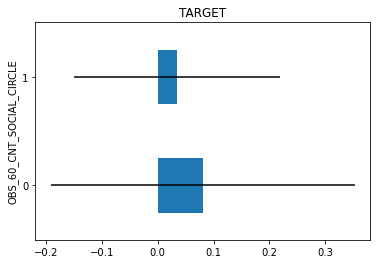

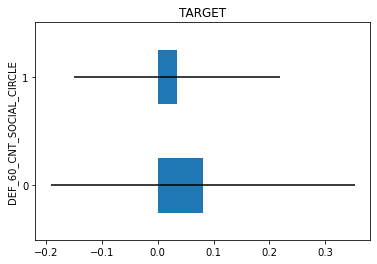

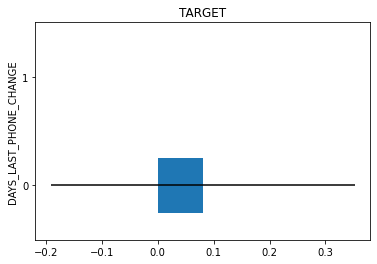

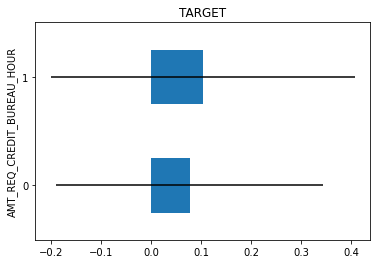

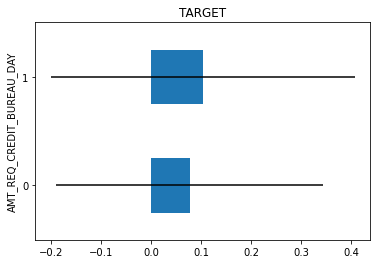

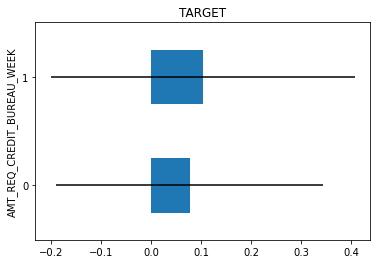

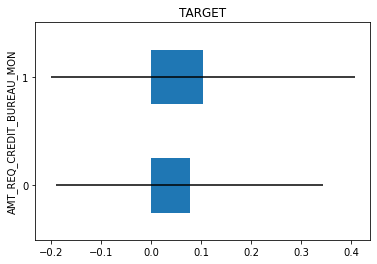

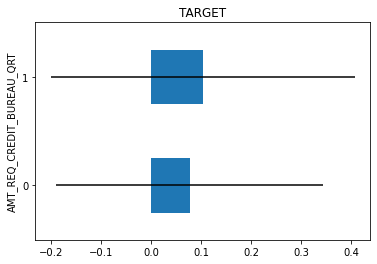

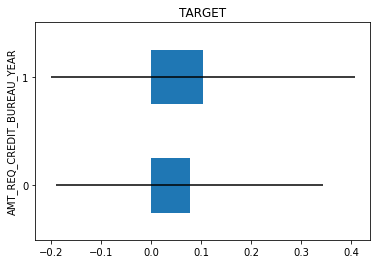

In [18]:
for var in var_with_na:
    na_impact_over_target(data, var, 'TARGET')

##### * Análisis de Variables Discretas

In [19]:
discrete_vars = [var for var in num_vars if((len(data[var].unique()) < 20))]
discrete_vars

['CNT_CHILDREN',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'FLAG_DOCUMENT_2',
 'FLAG_DOCUMENT_3',
 'FLAG_DOCUMENT_4',
 'FLAG_DOCUMENT_5',
 'FLAG_DOCUMENT_6',
 'FLAG_DOCUMENT_7',
 'FLAG_DOCUMENT_8',
 'FLAG_DOCUMENT_9',
 'FLAG_DOCUMENT_10',
 'FLAG_DOCUMENT_11',
 'FLAG_DOCUMENT_12',
 'FLAG_DOCUMENT_13',
 'FLAG_DOCUMENT_14',
 'FLAG_DOCUMENT_15',
 'FLAG_DOCUMENT_16',
 'FLAG_DOCUMENT_17',
 'FLAG_DOCUMENT_18',
 'FLAG_DOCUMENT_19',
 'FLAG_DOCUMENT_20',
 'FLAG_DOCUMENT_21',
 'AMT_REQ_CREDIT_BUREAU_HOUR',
 'AMT_REQ_CREDIT_BUREAU_DAY',
 'AMT_REQ_CREDIT_BUREAU_WEEK',
 'AMT_REQ_CREDIT_BUREAU_QRT']

In [20]:
print("Cantidad de Variables Discretas: ", len(discrete_vars))

Cantidad de Variables Discretas:  36


In [21]:
data[discrete_vars].head()

,CNT_CHILDREN,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,...,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_QRT
0,0,1.0,2,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0.0,0.0,0.0,0.0
1,0,2.0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0.0,0.0,0.0,0.0
2,0,1.0,2,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0.0,0.0,0.0,0.0
3,0,2.0,2,2,0,0,0,0,0,0,...,0,0,0,0,0,0,NaN,NaN,NaN,NaN
4,0,1.0,2,2,0,0,0,0,1,1,...,0,0,0,0,0,0,0.0,0.0,0.0,0.0


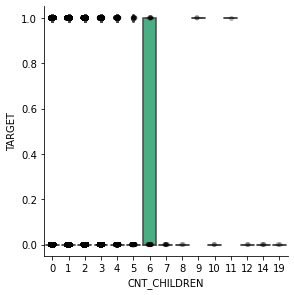

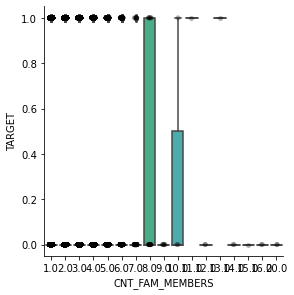

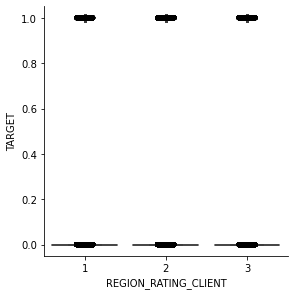

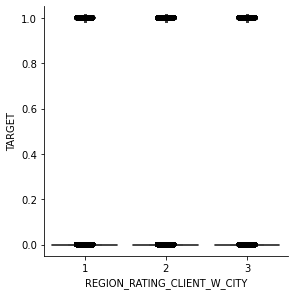

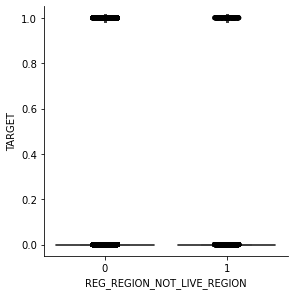

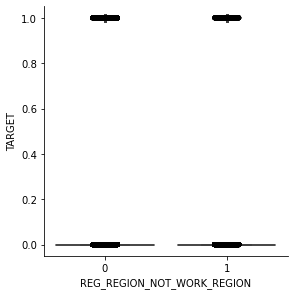

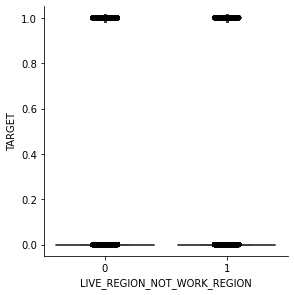

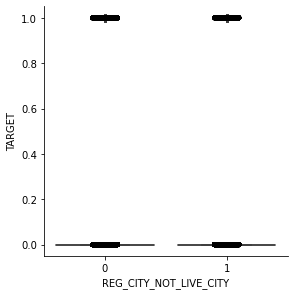

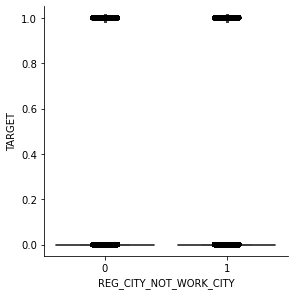

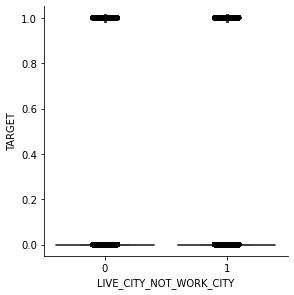

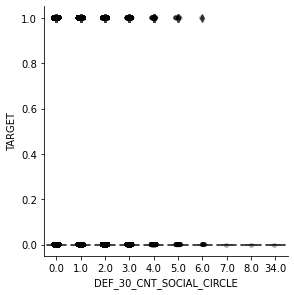

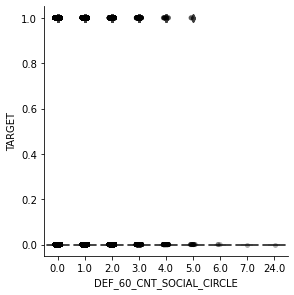

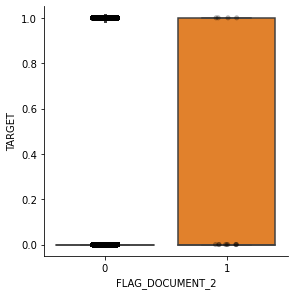

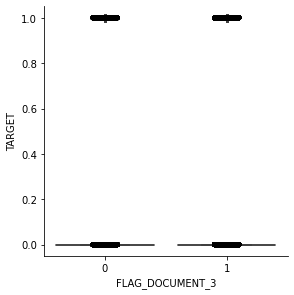

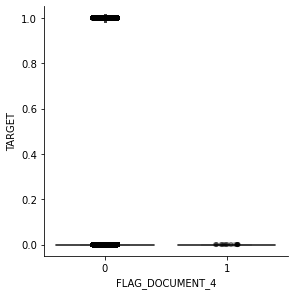

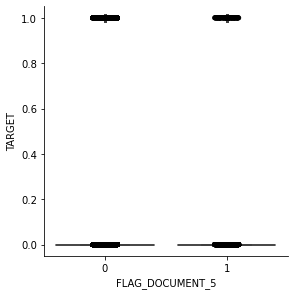

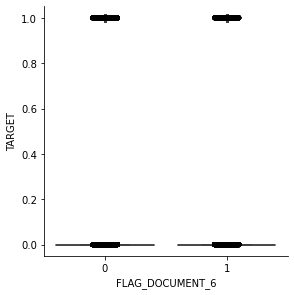

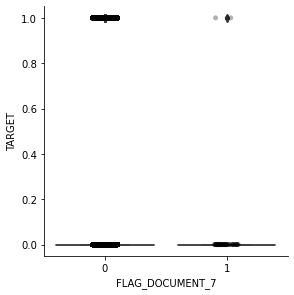

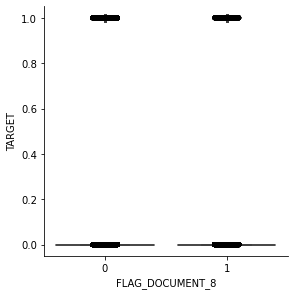

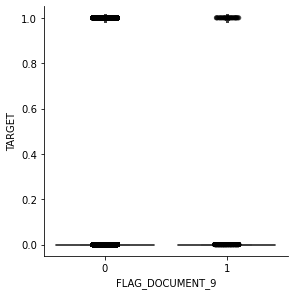

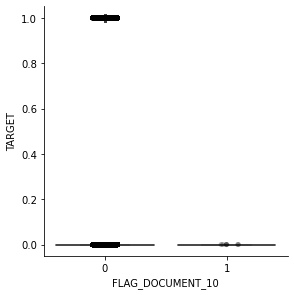

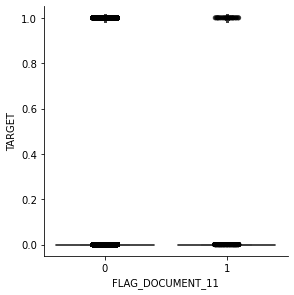

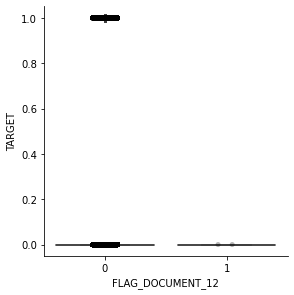

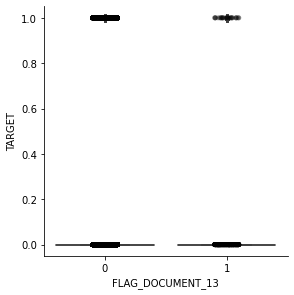

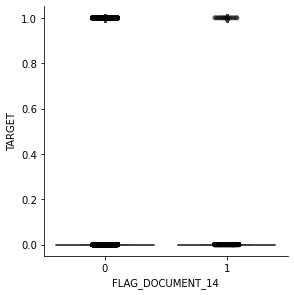

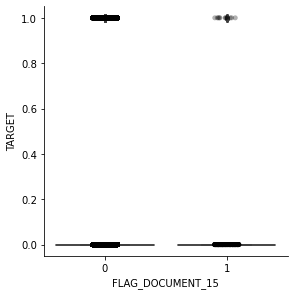

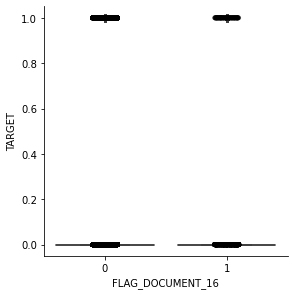

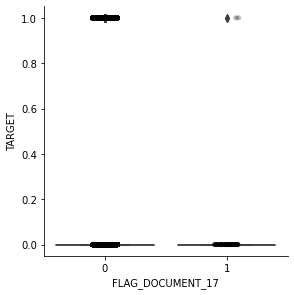

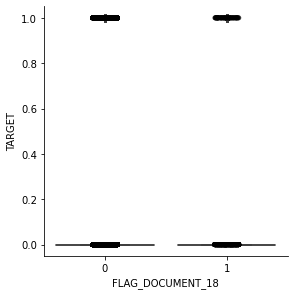

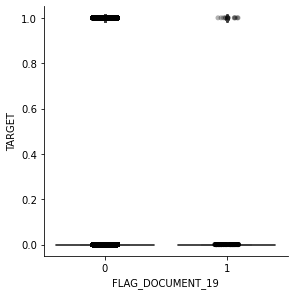

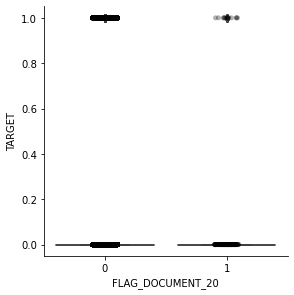

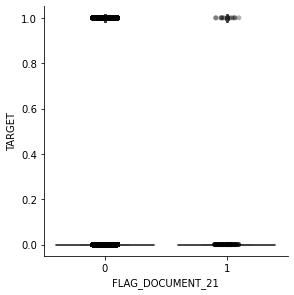

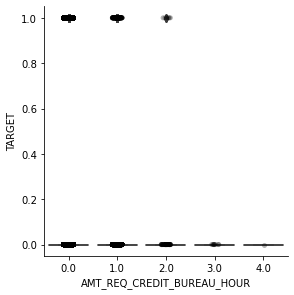

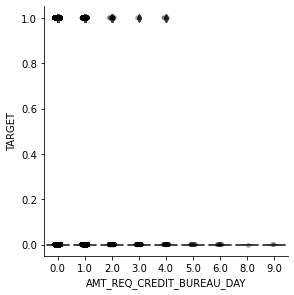

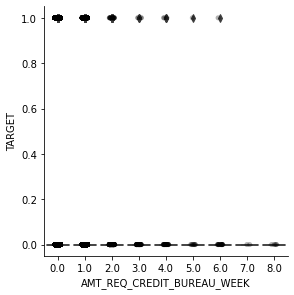

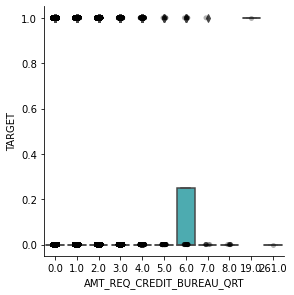

In [22]:
for var in discrete_vars:
    sns.catplot(x=var, y = 'TARGET', data=data, kind="box", height=4)
    sns.stripplot(x=var, y='TARGET', data=data, jitter=0.1, alpha=0.3,color='k')
    plt.show()

##### * Análisis de Variables Continuas

In [23]:
cont_vars = [var for var in num_vars if var not in discrete_vars]
#cont_vars

In [24]:
print("Variables Numericas Continuas: ", len(cont_vars))

Variables Numericas Continuas:  62


In [25]:
data[cont_vars].head()

,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,...,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_YEAR
0,202500.0,406597.5,24700.5,351000.0,0.018801,-9461,-637,-3648.0,-2120,NaN,...,0.0205,0.0193,0.0000,0.00,0.0149,2.0,2.0,-1134.0,0.0,1.0
1,270000.0,1293502.5,35698.5,1129500.0,0.003541,-16765,-1188,-1186.0,-291,NaN,...,0.0787,0.0558,0.0039,0.01,0.0714,1.0,1.0,-828.0,0.0,0.0
2,67500.0,135000.0,6750.0,135000.0,0.010032,-19046,-225,-4260.0,-2531,26.0,...,NaN,NaN,NaN,NaN,NaN,0.0,0.0,-815.0,0.0,0.0
3,135000.0,312682.5,29686.5,297000.0,0.008019,-19005,-3039,-9833.0,-2437,NaN,...,NaN,NaN,NaN,NaN,NaN,2.0,2.0,-617.0,NaN,NaN
4,121500.0,513000.0,21865.5,513000.0,0.028663,-19932,-3038,-4311.0,-3458,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,0.0,-1106.0,0.0,0.0


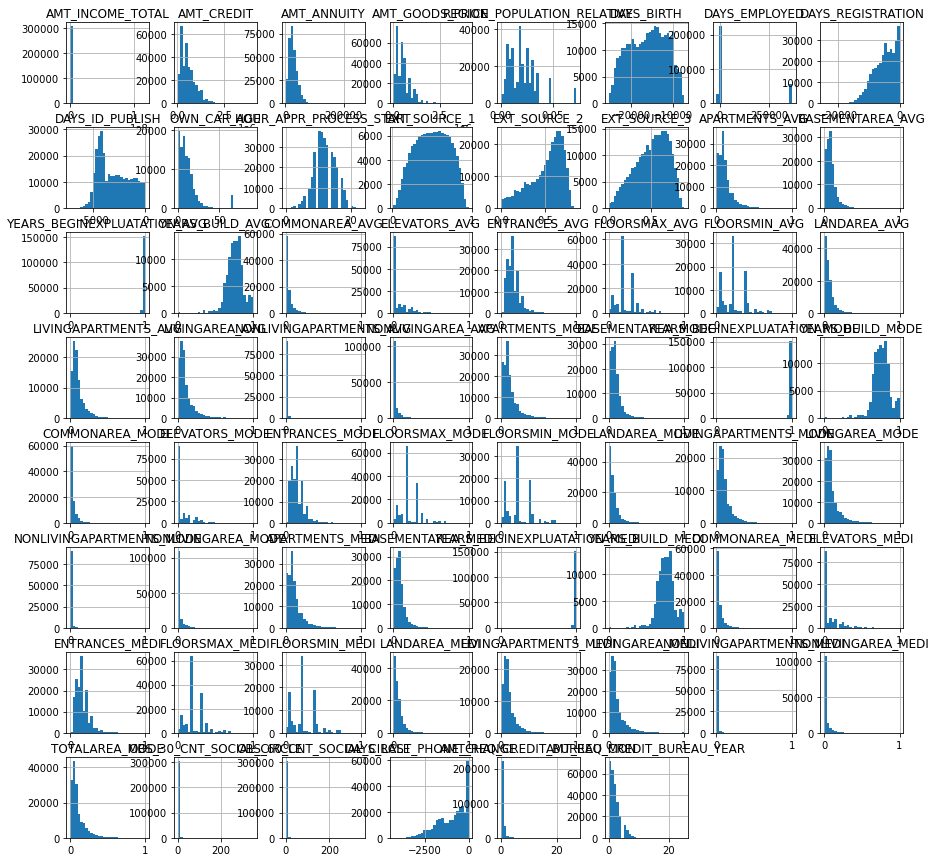

In [26]:
data[cont_vars].hist(bins=30, figsize=(15, 15))
plt.show()

In [27]:
sesgadas = ['AMT_INCOME_TOTAL',  'DAYS_EMPLOYED', 'YEARS_BEGINEXPLUATATION_AVG', 'NONLIVINGAPARTMENTS_AVG', 'YEARS_BEGINEXPLUATATION_MODE', 'NONLIVINGAPARTMENTS_MODE', 'YEARS_BEGINEXPLUATATION_MEDI', 'NONLIVINGAPARTMENTS_MEDI', 'OBS_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'AMT_REQ_CREDIT_BUREAU_MON']

In [28]:
cont_vars = [var for var in cont_vars if var not in sesgadas]
#cont_vars

##### * Transformación de Yeo-Johnson

In [29]:
temp_yj = data.copy()

In [30]:
for var in cont_vars:
    temp_yj[var], param = stats.yeojohnson(data[var])

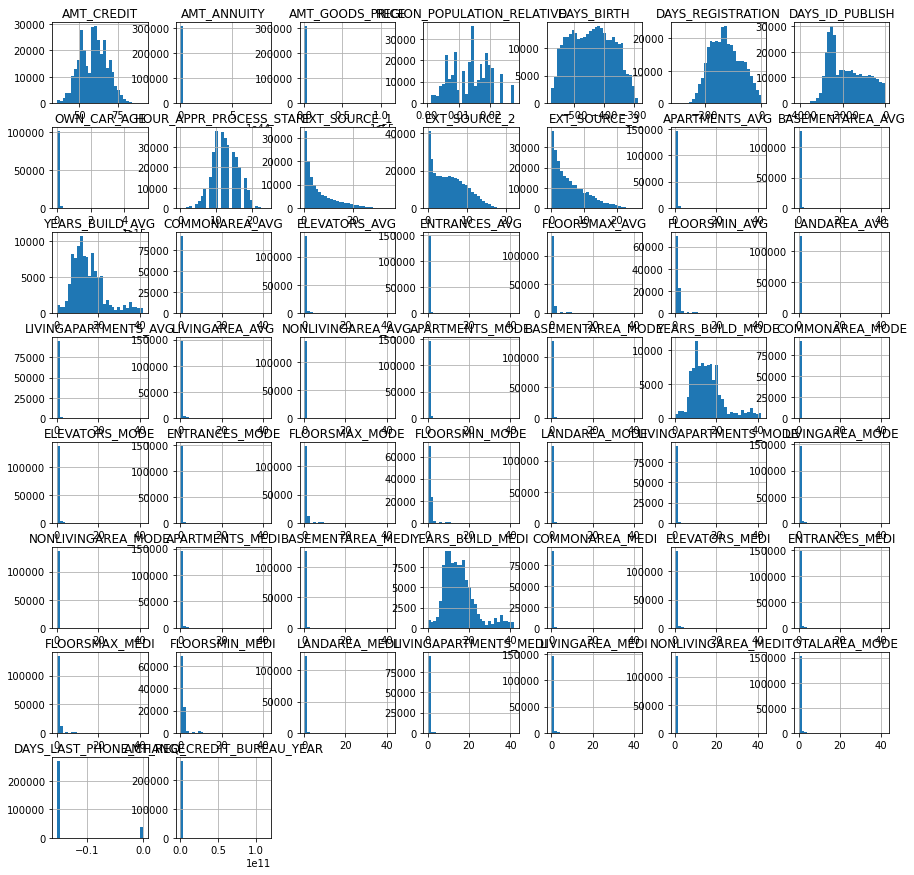

In [31]:
temp_yj[cont_vars].hist(bins=30, figsize=(15, 15))
plt.show()

In [32]:
len(cont_vars)

51

In [33]:
cont_specials = ['AMT_ANNUITY', 'AMT_GOODS_PRICE', 'OWN_CAR_AGE',  'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG', 'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG', 'NONLIVINGAREA_AVG', 'APARTMENTS_MODE', 'BASEMENTAREA_MODE',  'COMMONAREA_MODE', 'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE', 'FLOORSMIN_MODE', 'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE', 'LIVINGAREA_MODE', 'NONLIVINGAREA_MODE', 'APARTMENTS_MEDI', 'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI', 'ELEVATORS_MEDI', 'ENTRANCES_MEDI', 'FLOORSMAX_MEDI', 'FLOORSMIN_MEDI', 'LANDAREA_MEDI', 'LIVINGAPARTMENTS_MEDI', 'LIVINGAREA_MEDI', 'NONLIVINGAREA_MEDI', 'TOTALAREA_MODE', 'DAYS_LAST_PHONE_CHANGE', 'AMT_REQ_CREDIT_BUREAU_YEAR']

In [34]:
temp = data.copy()

for var in cont_vars:
    temp[var] = np.sqrt(np.power(data[var],2))

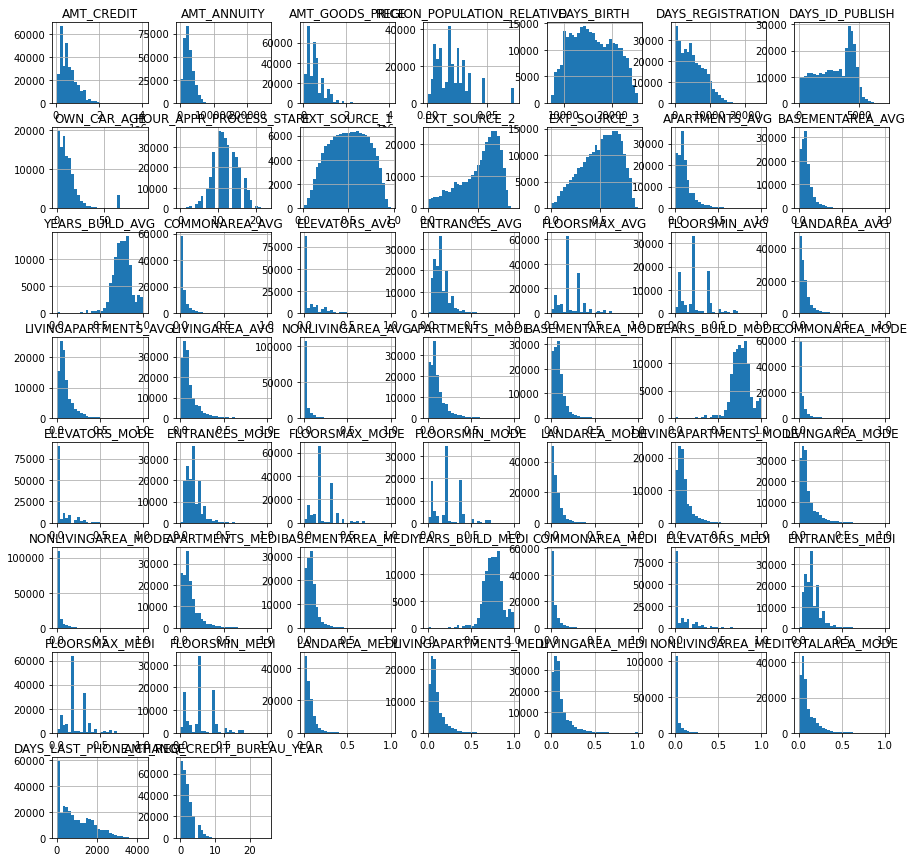

In [35]:
temp[cont_vars].hist(bins=30, figsize=(15,15))
plt.show()

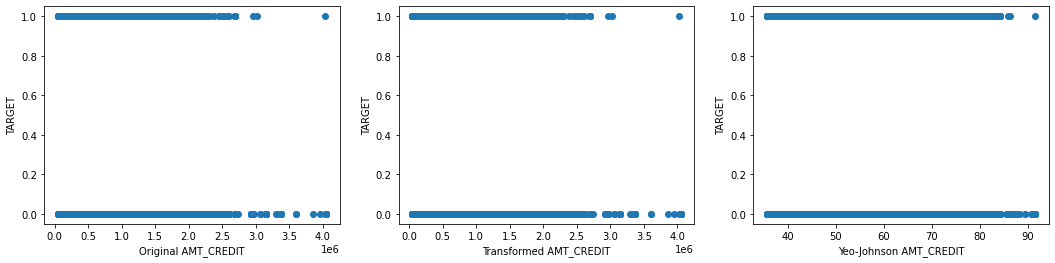

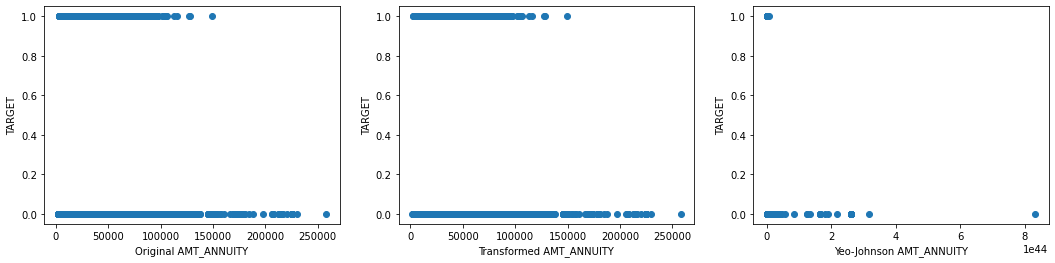

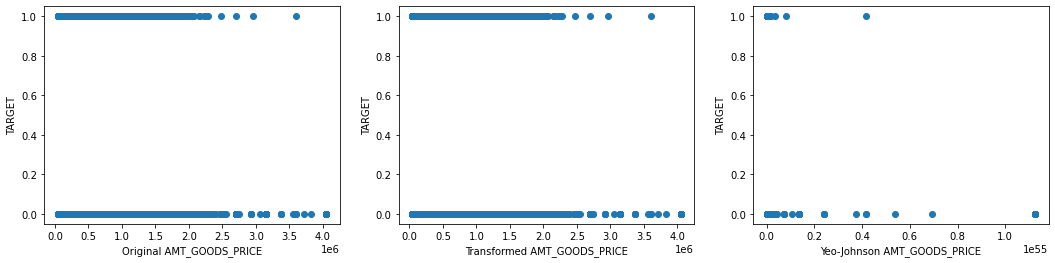

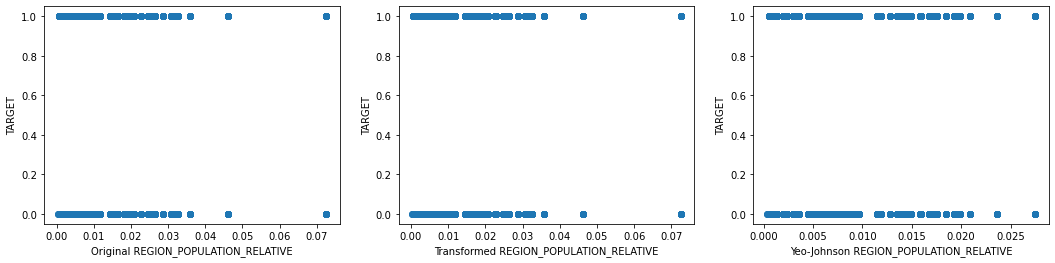

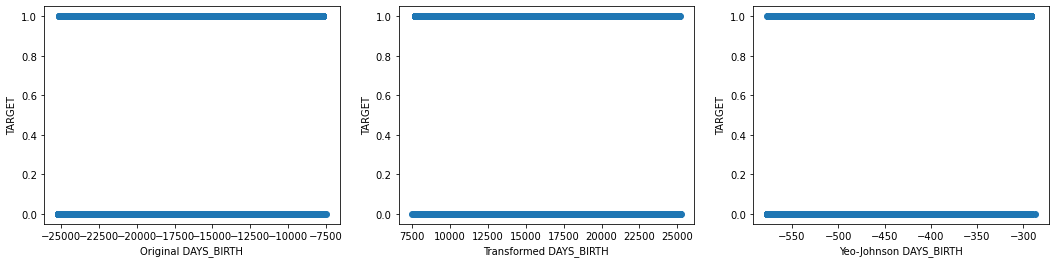

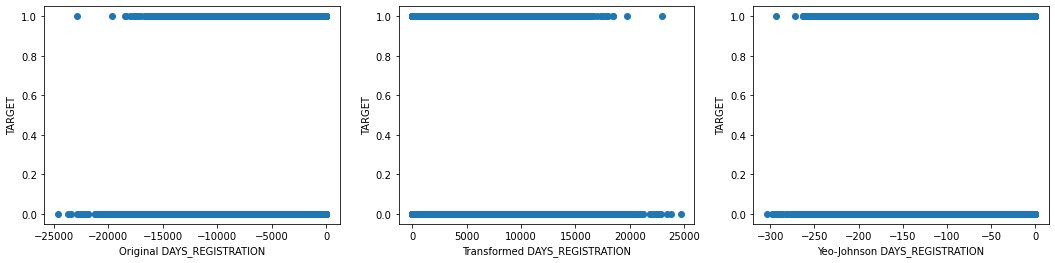

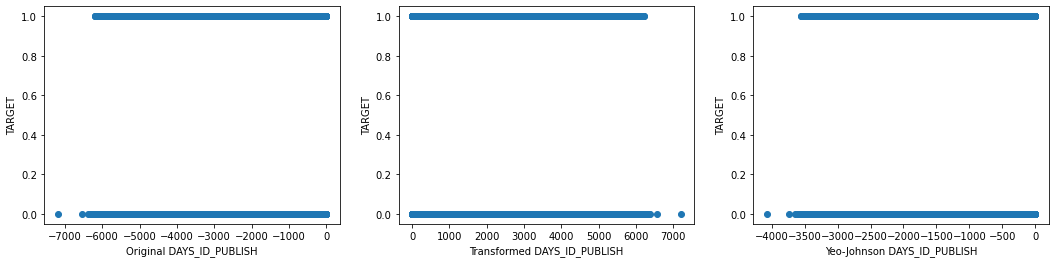

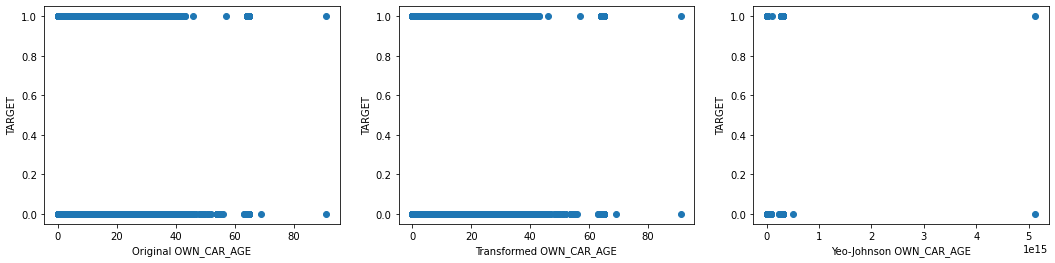

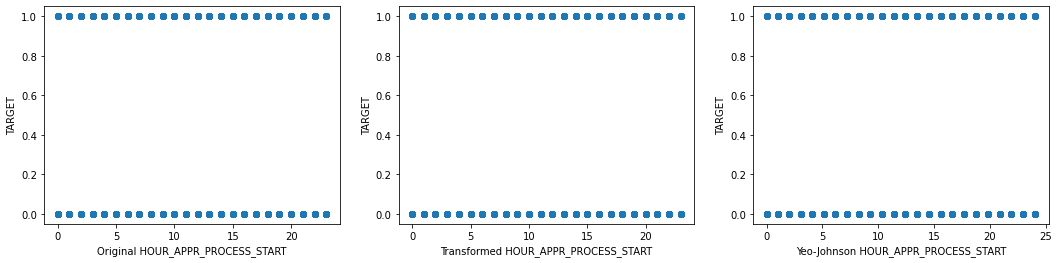

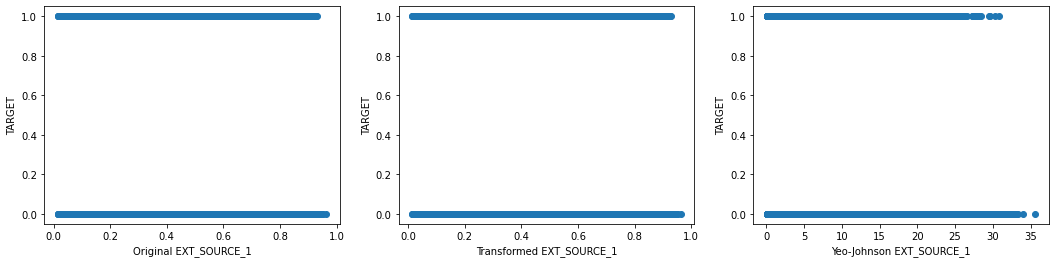

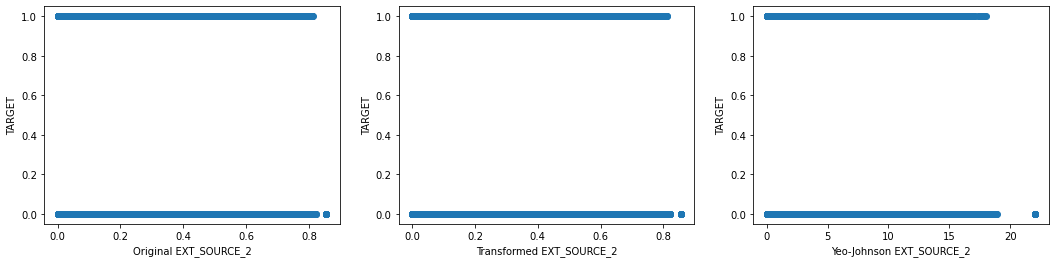

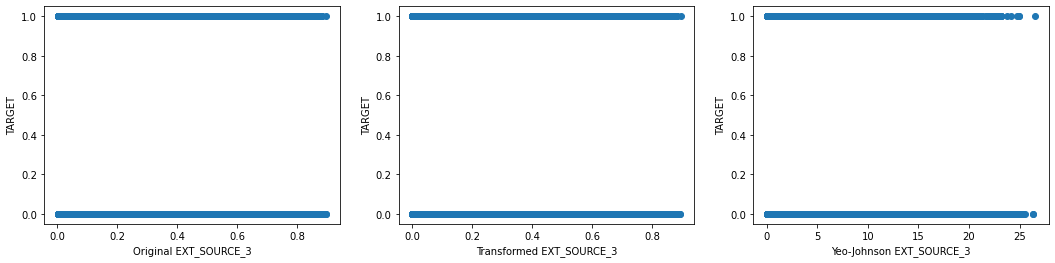

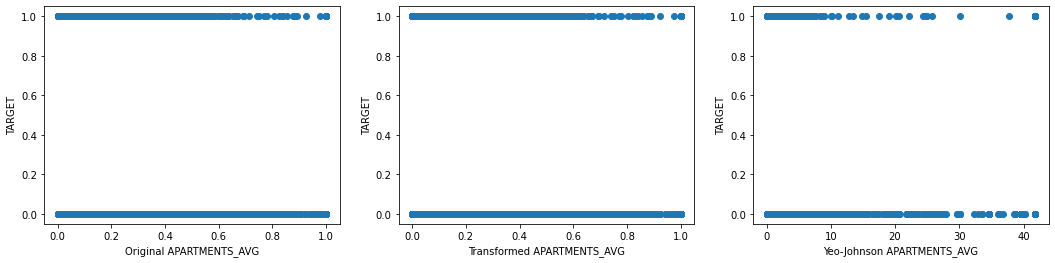

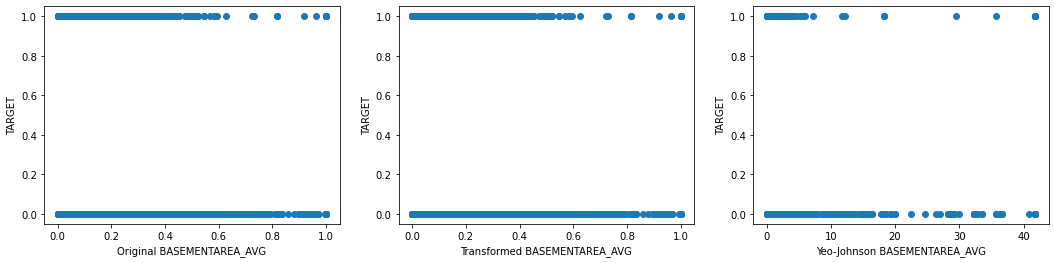

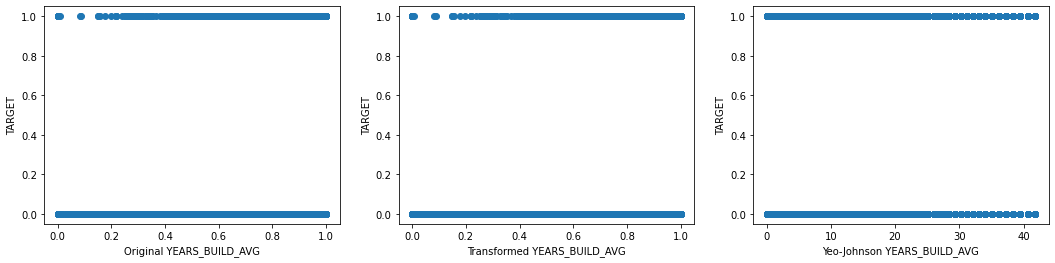

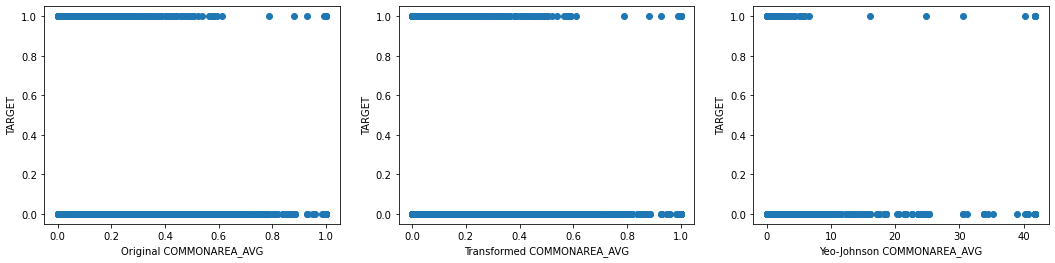

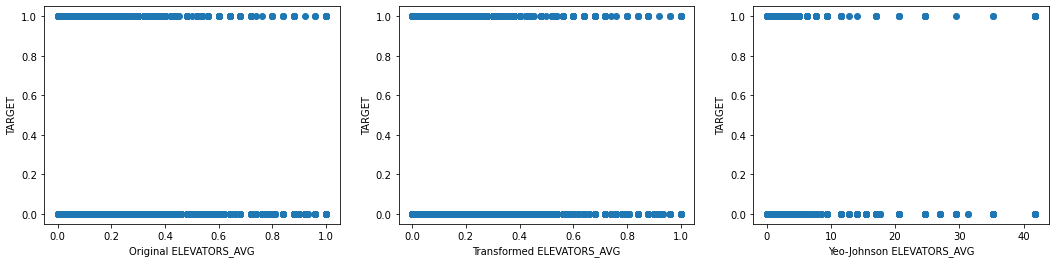

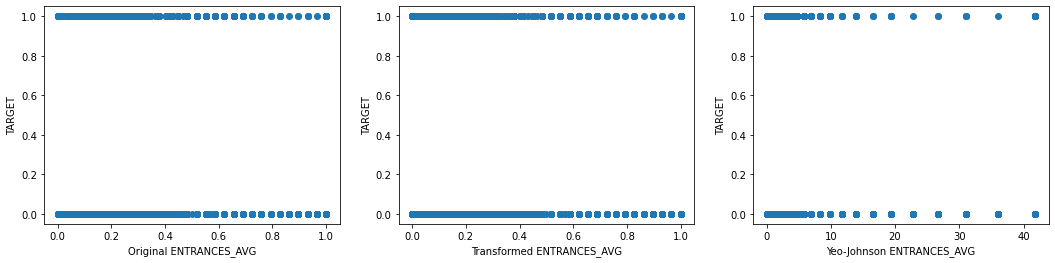

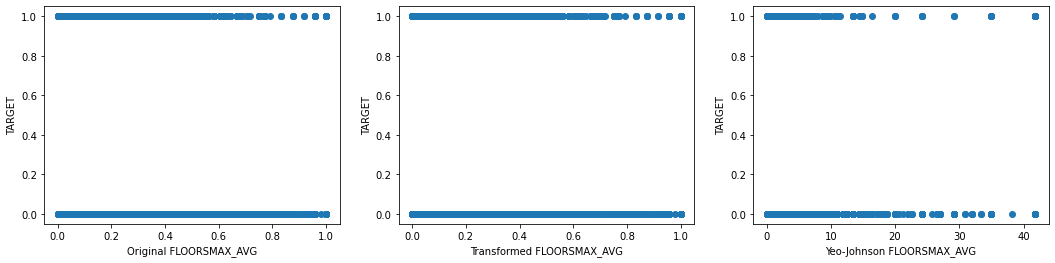

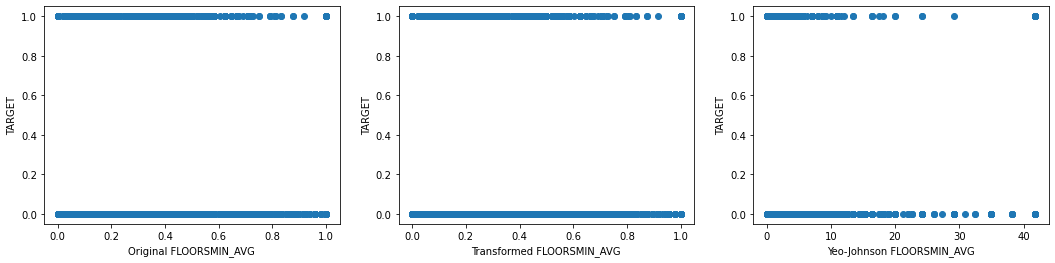

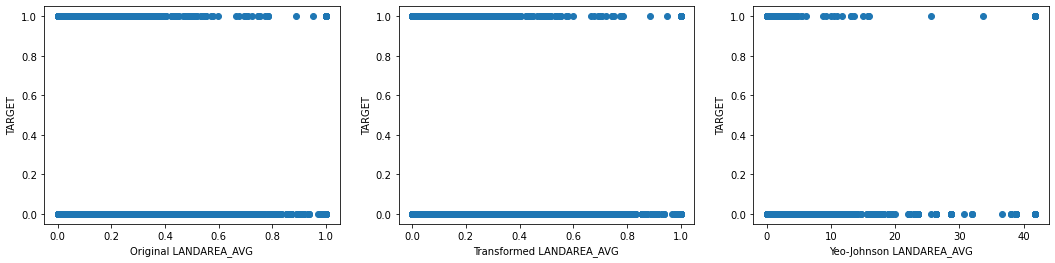

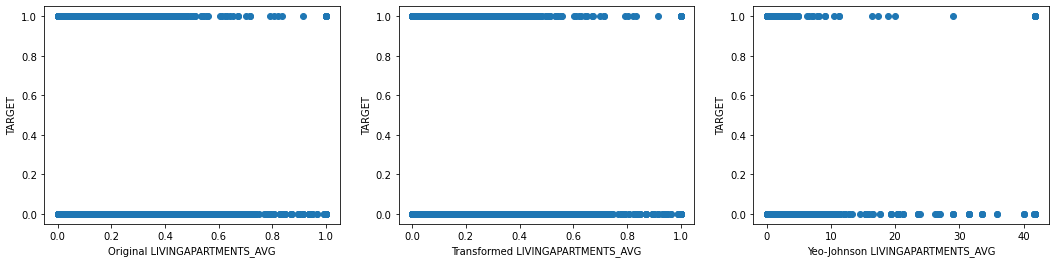

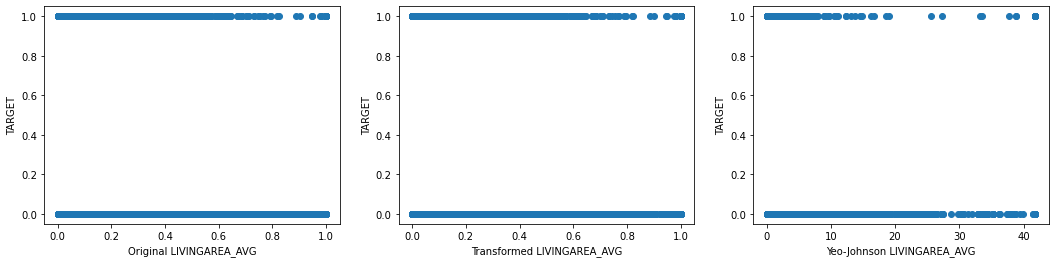

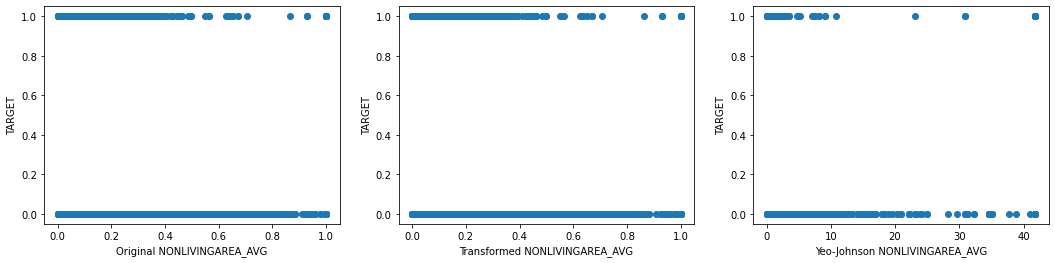

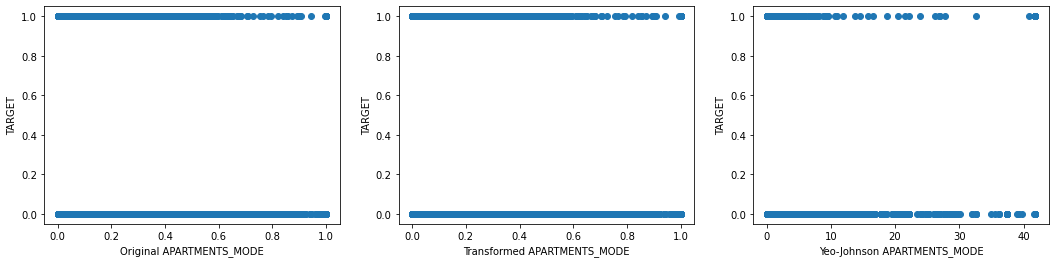

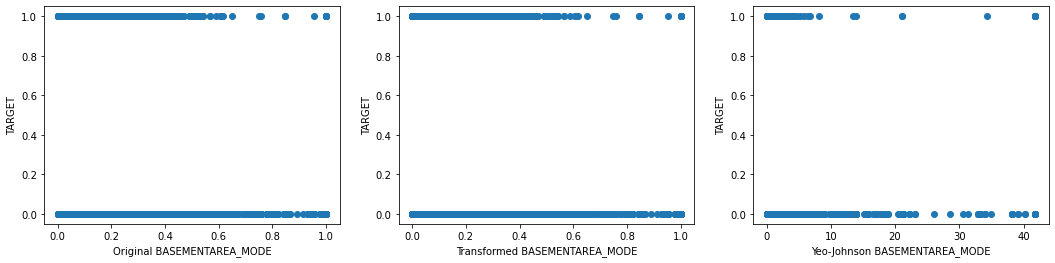

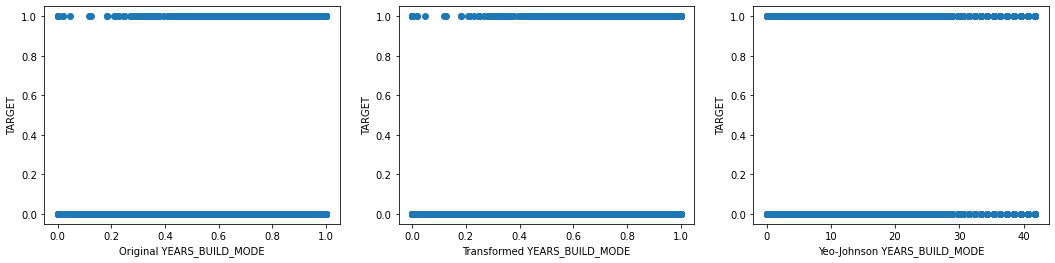

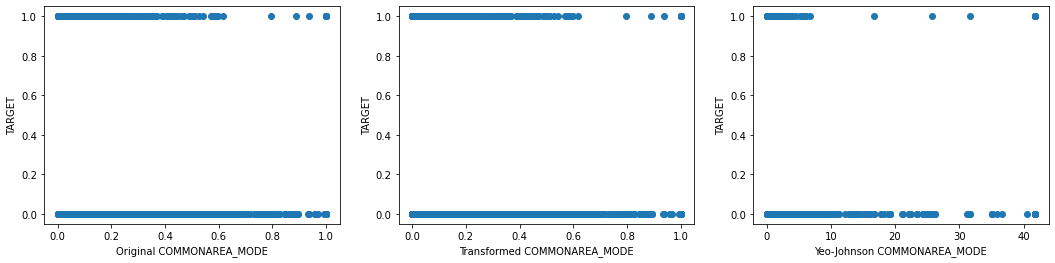

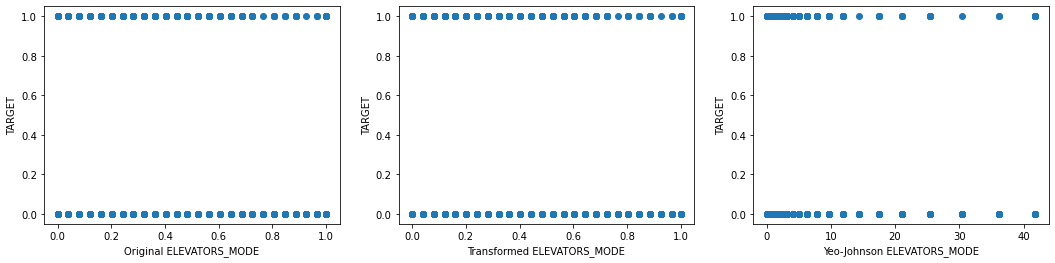

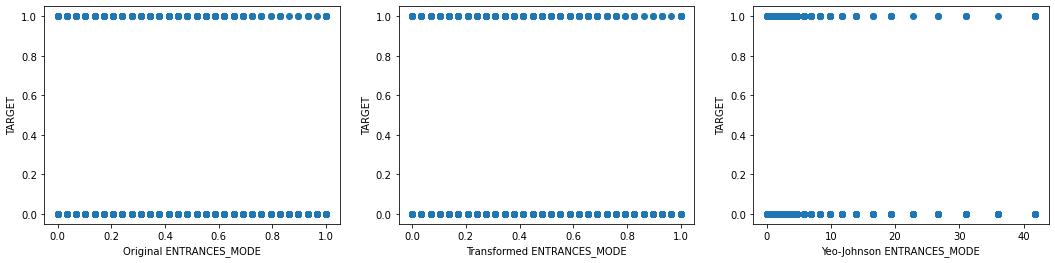

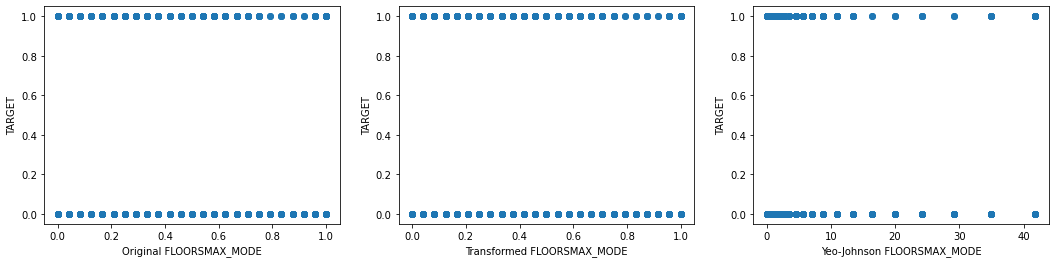

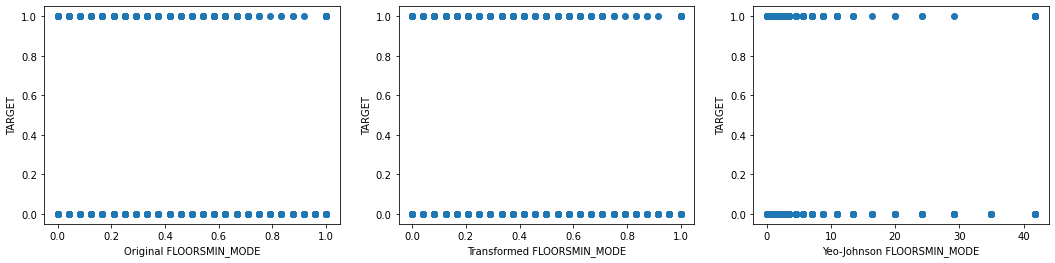

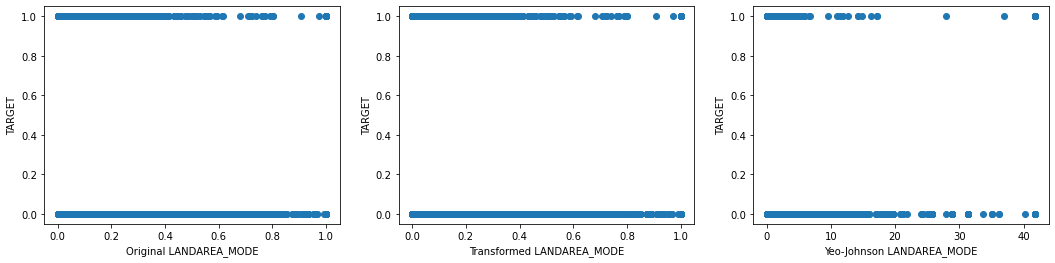

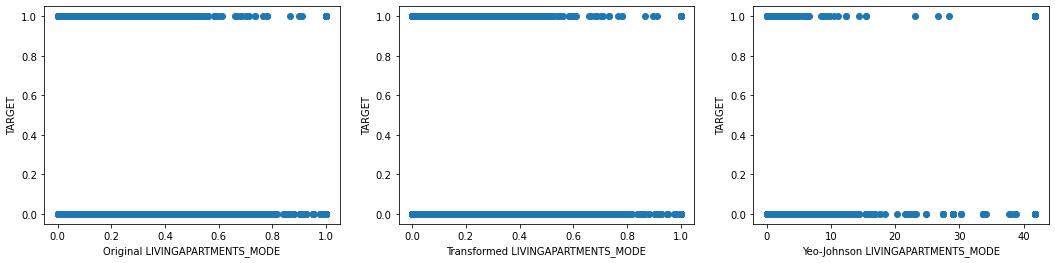

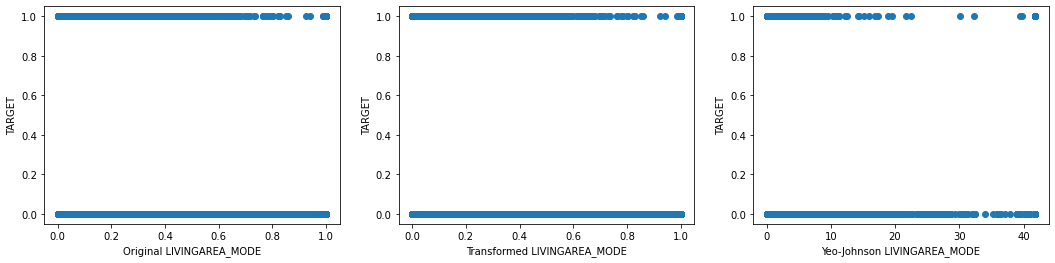

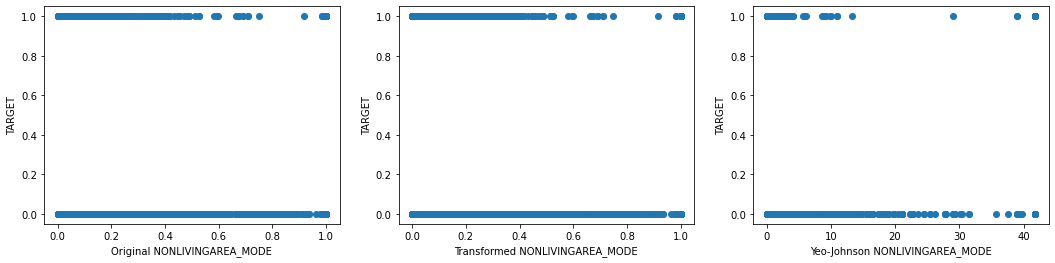

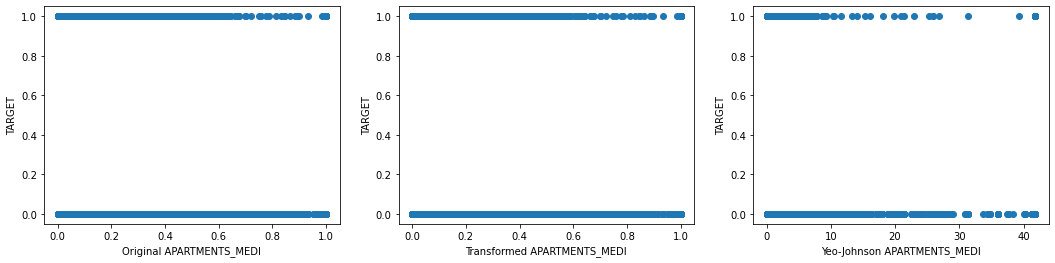

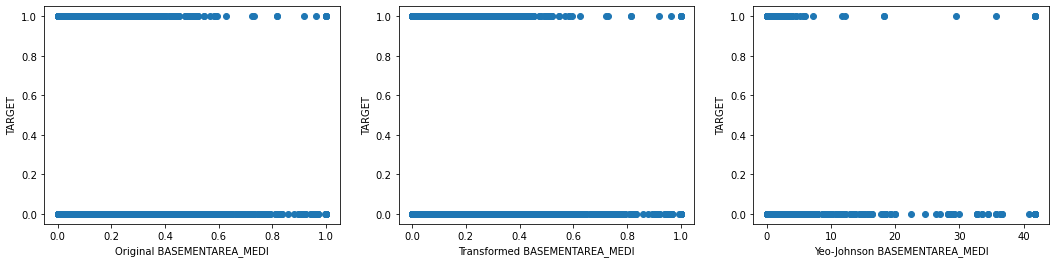

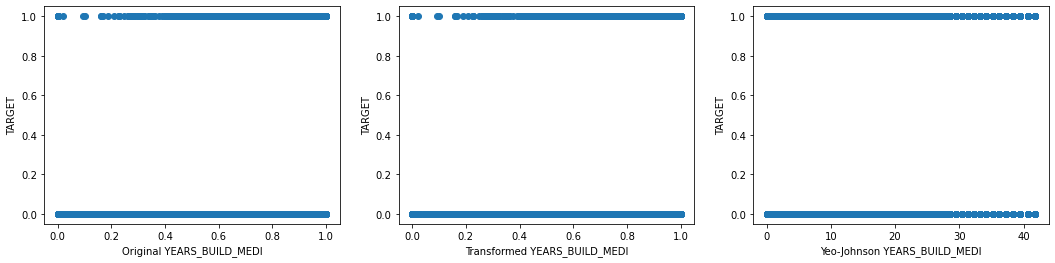

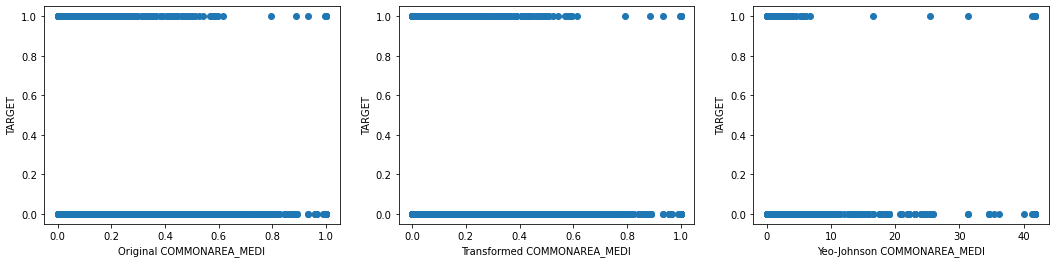

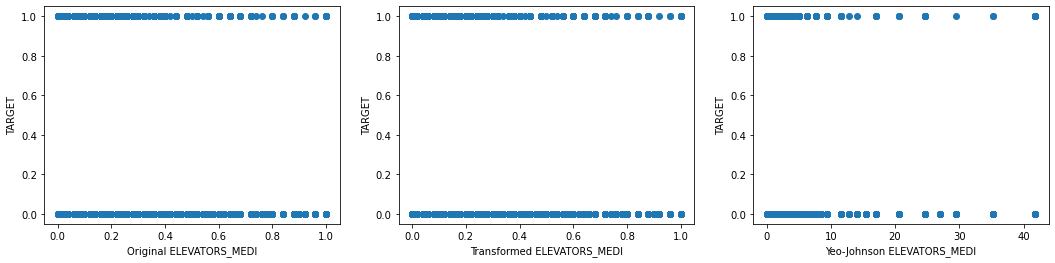

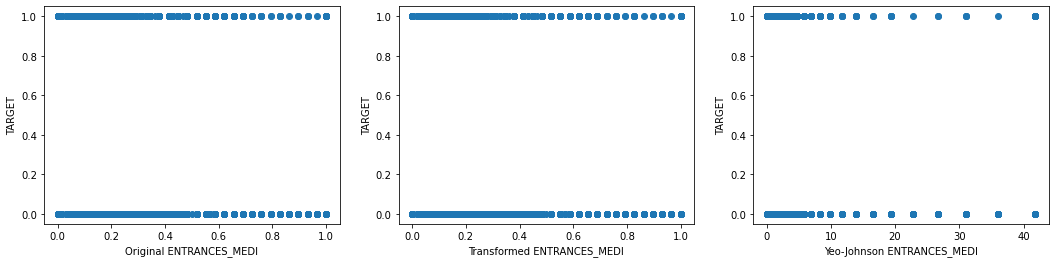

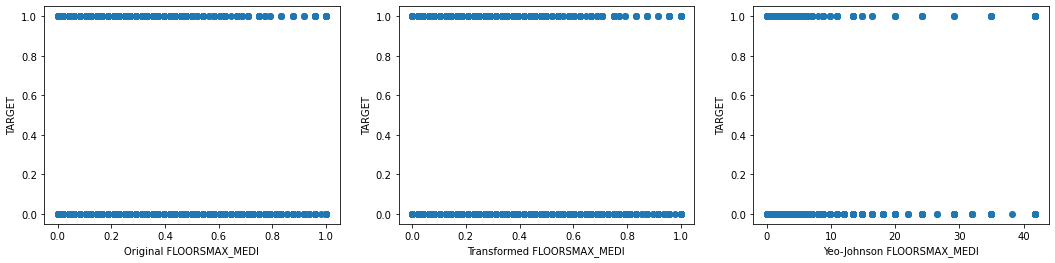

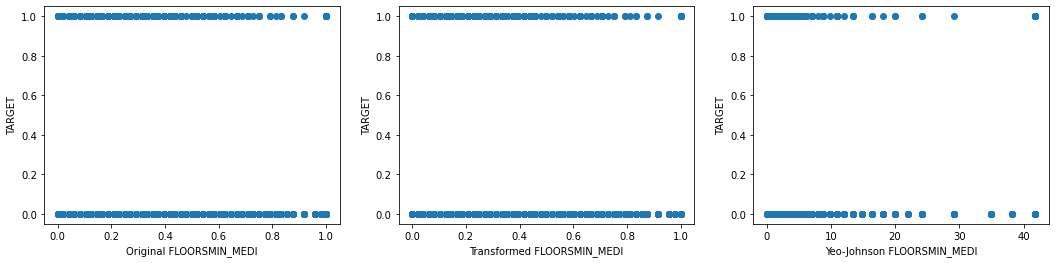

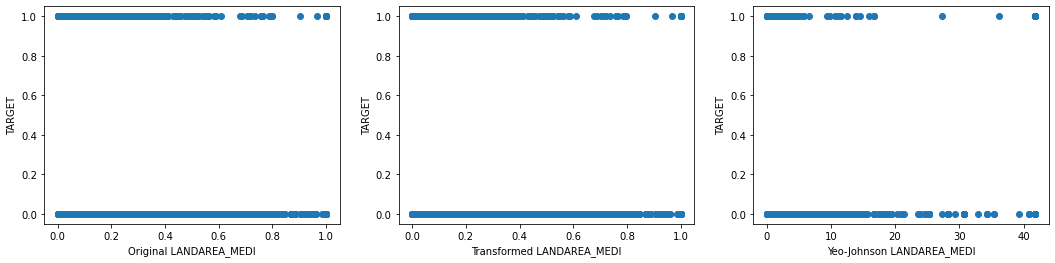

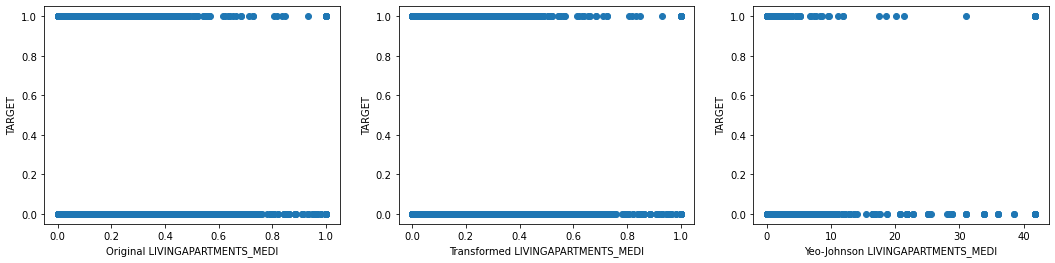

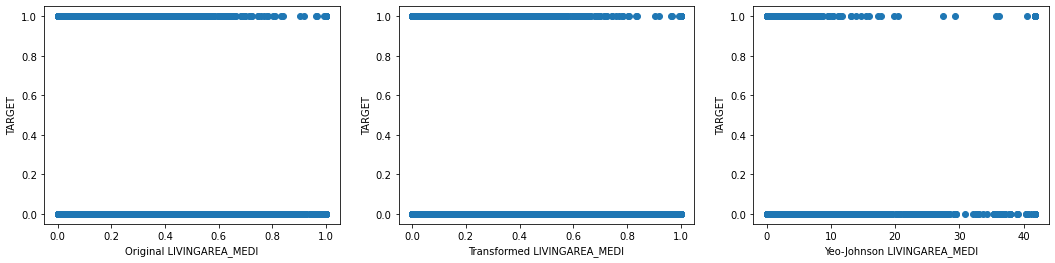

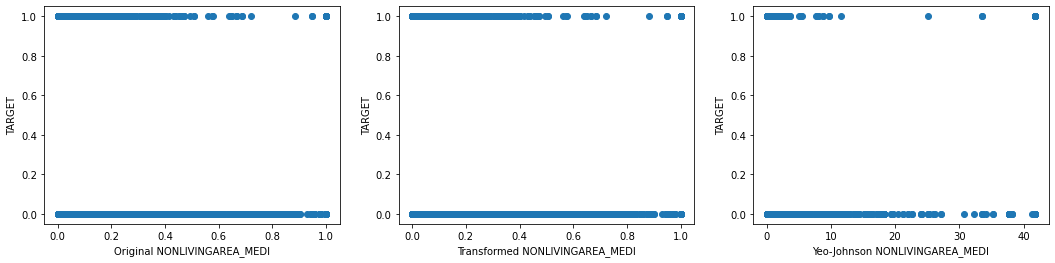

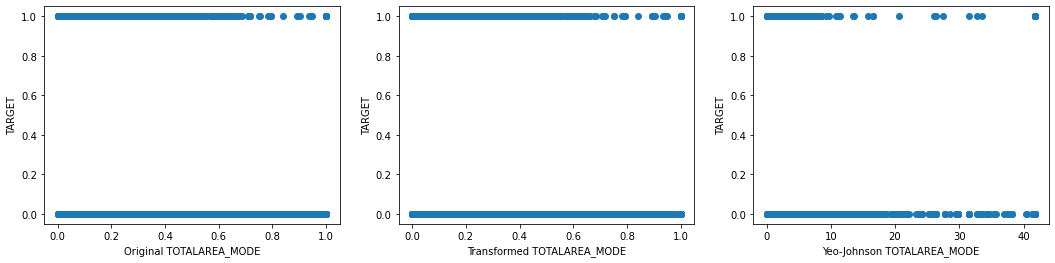

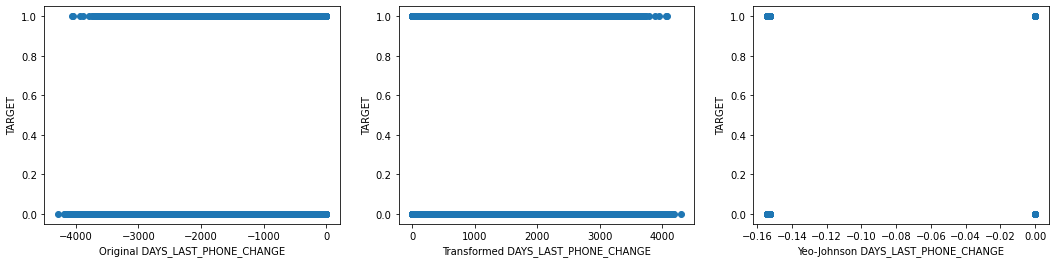

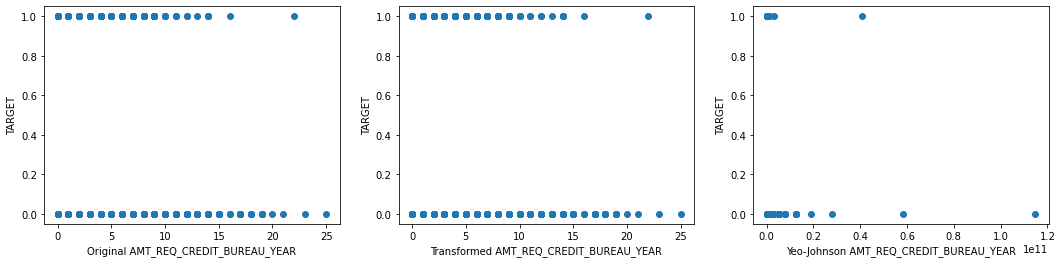

In [36]:
for var in cont_vars:
    plt.figure(figsize=(18, 4))
    
    plt.subplot(1, 3, 1)
    plt.scatter(data[var], np.sqrt(np.power(data['TARGET'],2)))
    plt.ylabel("TARGET")
    plt.xlabel("Original " + var)
    
    plt.subplot(1, 3, 2)
    plt.scatter(temp[var], np.sqrt(np.power(data['TARGET'],2)))
    plt.ylabel("TARGET")
    plt.xlabel("Transformed " + var)
    
    plt.subplot(1, 3, 3)
    plt.scatter(temp_yj[var], np.sqrt(np.power(data['TARGET'],2)))
    plt.ylabel("TARGET")
    plt.xlabel("Yeo-Johnson " + var)

    plt.show()

##### * Variables con Sesgo

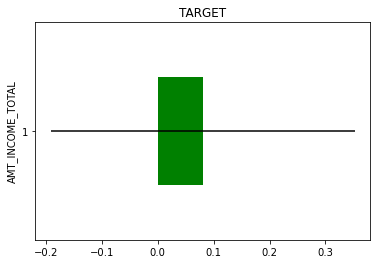

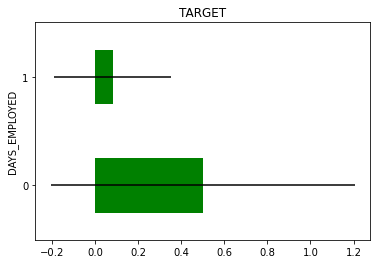

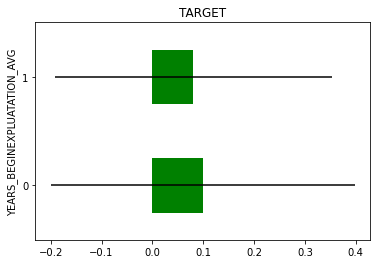

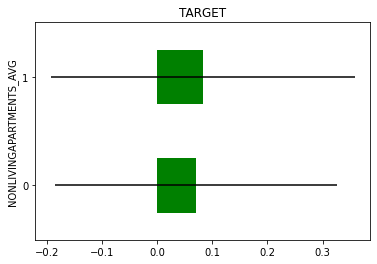

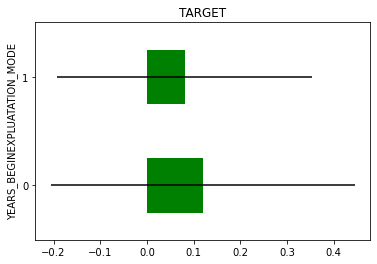

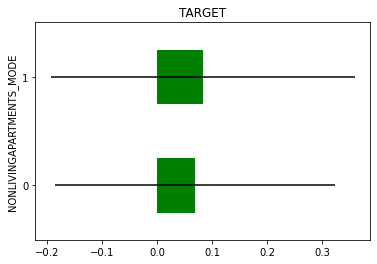

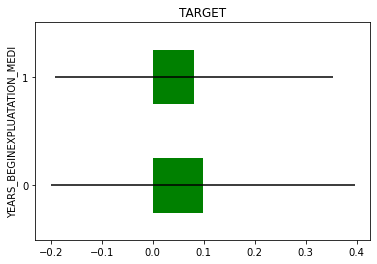

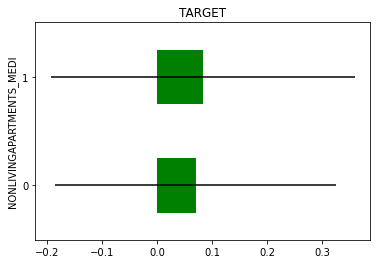

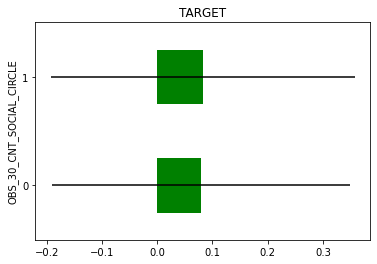

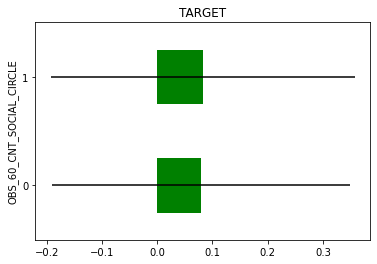

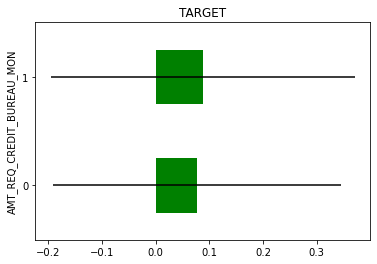

In [37]:
for var in sesgadas:
    temp = data.copy()
    
    temp[var] = np.where(data[var] == 0, 0, 1)
    
    temp = temp.groupby(var)['TARGET'].agg(['mean', 'std'])
    
    temp.plot(kind='barh', y="mean", legend=False, xerr="std", title = "TARGET", color="green")
    plt.show()

##### * Variables Categóricas

In [38]:
len(cat_vars)

22

In [39]:
data[cat_vars].head()

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,...,FONDKAPREMONT_MODE,HOUSETYPE_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL
0,Cash loans,M,N,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,...,reg oper account,block of flats,"Stone, brick",No,1,1,0,1,1,0
1,Cash loans,F,N,N,Family,State servant,Higher education,Married,House / apartment,Core staff,...,reg oper account,block of flats,Block,No,1,1,0,1,1,0
2,Revolving loans,M,Y,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,...,NaN,NaN,NaN,NaN,1,1,1,1,1,0
3,Cash loans,F,N,Y,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,Laborers,...,NaN,NaN,NaN,NaN,1,1,0,1,0,0
4,Cash loans,M,N,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Core staff,...,NaN,NaN,NaN,NaN,1,1,0,1,0,0


<AxesSubplot:>

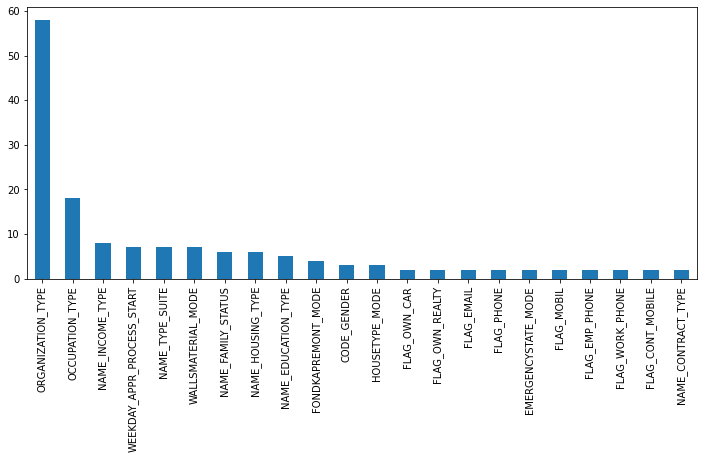

In [40]:
data[cat_vars].nunique().sort_values(ascending=False).plot.bar(figsize=(12,5))

In [41]:
np.unique(data['NAME_CONTRACT_TYPE'])

data_mapping = {'Cash loans':1, 'Revolving loans':0}

data['NAME_CONTRACT_TYPE'] = data['NAME_CONTRACT_TYPE'].map(data_mapping)

In [42]:
np.unique(data['CODE_GENDER'])

data_mapping = {'M':1, 'F':0, 'XNA':2}

data['CODE_GENDER'] = data['CODE_GENDER'].map(data_mapping)

In [43]:
np.unique(data['FLAG_OWN_CAR'])

data_mapping = {'Y':1, 'N':0}

data['FLAG_OWN_CAR'] = data['FLAG_OWN_CAR'].map(data_mapping)

In [44]:
np.unique(data['FLAG_OWN_REALTY'])

data_mapping = {'Y':1, 'N':0}

data['FLAG_OWN_REALTY'] = data['FLAG_OWN_REALTY'].map(data_mapping)

In [45]:
#np.unique(data['NAME_TYPE_SUITE'])

In [46]:
np.unique(data['NAME_INCOME_TYPE'])

data_mapping = {'Businessman':0, 'Unemployed':1, 'Commercial associate':2, 'Maternity leave':3, 'Pensioner':4, 'State servant':5, 'Student':6, 'Working':7}
data['NAME_INCOME_TYPE'] = data['NAME_INCOME_TYPE'].map(data_mapping)

In [47]:
np.unique(data['NAME_EDUCATION_TYPE'])

data_mapping = {'Academic degree':0, 'Higher education':1, 'Incomplete higher':2, 'Lower secondary':3, 'Secondary / secondary special':4}

data['NAME_EDUCATION_TYPE'] = data['NAME_EDUCATION_TYPE'].map(data_mapping)

In [48]:
np.unique(data['NAME_FAMILY_STATUS'])

data_mapping = {'Civil marriage':0, 'Married':1, 'Separated':2, 'Single / not married':3, 'Unknown':4, 'Widow':5}

data['NAME_FAMILY_STATUS'] = data['NAME_FAMILY_STATUS'].map(data_mapping)

In [49]:
np.unique(data['NAME_HOUSING_TYPE'])

data_mapping = {'Co-op apartment':0, 'House / apartment':1, 'Municipal apartment':2, 'Office apartment':3, 'Rented apartment':4, 'With parents':5}

data['NAME_HOUSING_TYPE'] = data['NAME_HOUSING_TYPE'].map(data_mapping)

In [50]:
#np.unique(data['OCCUPATION_TYPE'])

In [51]:
np.unique(data['WEEKDAY_APPR_PROCESS_START'])

data_mapping = {'SUNDAY':0, 'MONDAY':1, 'TUESDAY':2, 'WEDNESDAY':3, 'THURSDAY':4, 'FRIDAY':5, 'SATURDAY':6, 'SUNDAY':7}

data['WEEKDAY_APPR_PROCESS_START'] = data['WEEKDAY_APPR_PROCESS_START'].map(data_mapping)

In [52]:
np.unique(data['ORGANIZATION_TYPE'])

array(['Advertising', 'Agriculture', 'Bank', 'Business Entity Type 1',
       'Business Entity Type 2', 'Business Entity Type 3', 'Cleaning',
       'Construction', 'Culture', 'Electricity', 'Emergency',
       'Government', 'Hotel', 'Housing', 'Industry: type 1',
       'Industry: type 10', 'Industry: type 11', 'Industry: type 12',
       'Industry: type 13', 'Industry: type 2', 'Industry: type 3',
       'Industry: type 4', 'Industry: type 5', 'Industry: type 6',
       'Industry: type 7', 'Industry: type 8', 'Industry: type 9',
       'Insurance', 'Kindergarten', 'Legal Services', 'Medicine',
       'Military', 'Mobile', 'Other', 'Police', 'Postal', 'Realtor',
       'Religion', 'Restaurant', 'School', 'Security',
       'Security Ministries', 'Self-employed', 'Services', 'Telecom',
       'Trade: type 1', 'Trade: type 2', 'Trade: type 3', 'Trade: type 4',
       'Trade: type 5', 'Trade: type 6', 'Trade: type 7',
       'Transport: type 1', 'Transport: type 2', 'Transport: type 3',


In [53]:
#np.unique(data['FONDKAPREMONT_MODE'])

In [54]:
#np.unique(data['HOUSETYPE_MODE'])

In [55]:
#np.unique(data['WALLSMATERIAL_MODE'])

In [56]:
#np.unique(data['EMERGENCYSTATE_MODE'])

In [57]:
np.unique(data['FLAG_MOBIL'])

array([0, 1], dtype=object)

In [58]:
np.unique(data['FLAG_EMP_PHONE'])

array([0, 1], dtype=object)

In [59]:
np.unique(data['FLAG_WORK_PHONE'])

array([0, 1], dtype=object)

In [60]:
np.unique(data['FLAG_CONT_MOBILE'])

array([0, 1], dtype=object)

In [61]:
np.unique(data['FLAG_PHONE'])

array([0, 1], dtype=object)

In [62]:
np.unique(data['FLAG_EMAIL'])

array([0, 1], dtype=object)

In [63]:
#qual_vars = qual_vars + finish_vars + ['BsmtExposure', 'GarageFinish', 'Fence']
qual_vars = "0"

for var in qual_vars:
    sns.catplot(x=var, y = 'TARGET', data=data, kind="box", height=4, aspect=1.5)
    sns.stripplot(x=var, y='TARGET', data=data, jitter=0.1, alpha=0.3,color='k')
    plt.show()

In [64]:
otras = [var for var in cat_vars if var not in qual_vars]

In [65]:
len(otras)

22

##### * Rare Labels

In [66]:
def analyse_rare_labels(df, var, rare_perc):
    temp = df.groupby(var)['TARGET'].count()/len(df)
    
    return temp[temp < rare_perc]

In [67]:
for var in otras:
    print(analyse_rare_labels(data, var, 0.01))
    print()

Series([], Name: TARGET, dtype: float64)

CODE_GENDER
2    0.000013
Name: TARGET, dtype: float64

Series([], Name: TARGET, dtype: float64)

Series([], Name: TARGET, dtype: float64)

NAME_TYPE_SUITE
Group of people    0.000881
Other_A            0.002816
Other_B            0.005756
Name: TARGET, dtype: float64

NAME_INCOME_TYPE
0    0.000033
1    0.000072
3    0.000016
6    0.000059
Name: TARGET, dtype: float64

NAME_EDUCATION_TYPE
0    0.000533
Name: TARGET, dtype: float64

NAME_FAMILY_STATUS
4    0.000007
Name: TARGET, dtype: float64

NAME_HOUSING_TYPE
0    0.003649
3    0.008510
Name: TARGET, dtype: float64

OCCUPATION_TYPE
HR staff                 0.001831
IT staff                 0.001711
Low-skill Laborers       0.006806
Private service staff    0.008624
Realty agents            0.002442
Secretaries              0.004244
Waiters/barmen staff     0.004384
Name: TARGET, dtype: float64

Series([], Name: TARGET, dtype: float64)

ORGANIZATION_TYPE
Advertising            0.001395
Agricu

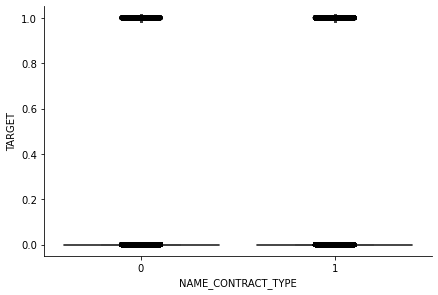

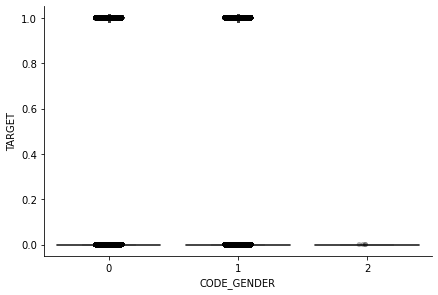

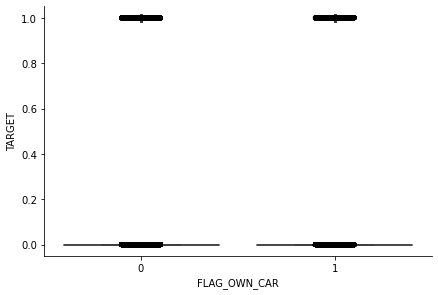

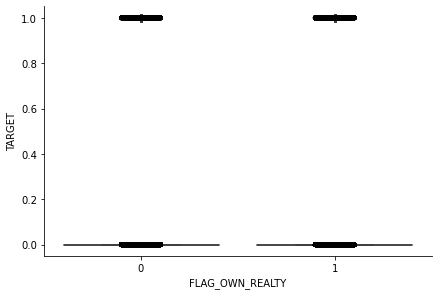

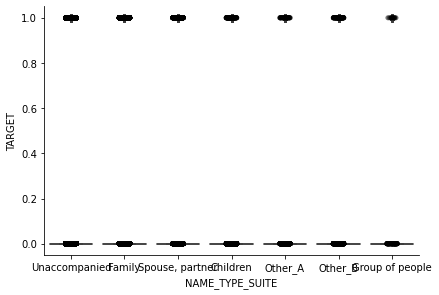

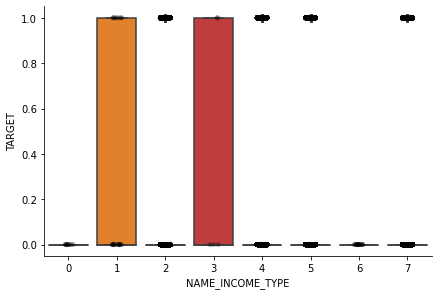

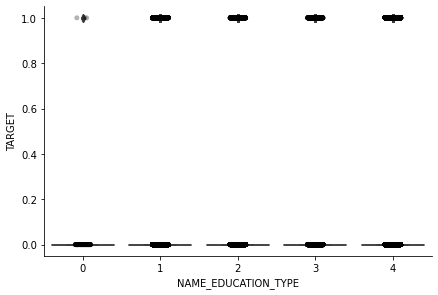

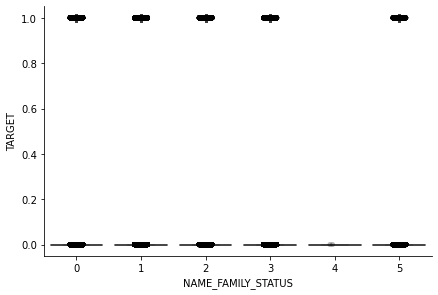

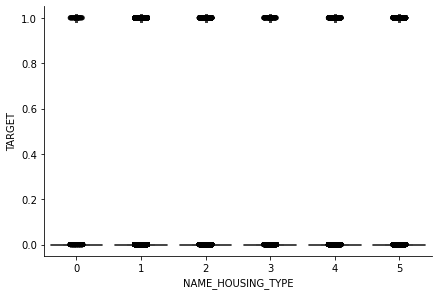

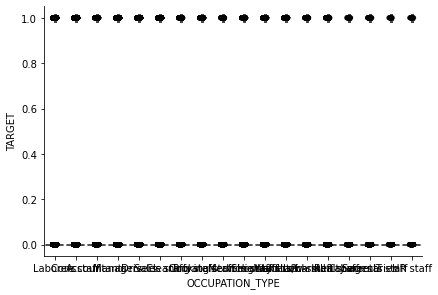

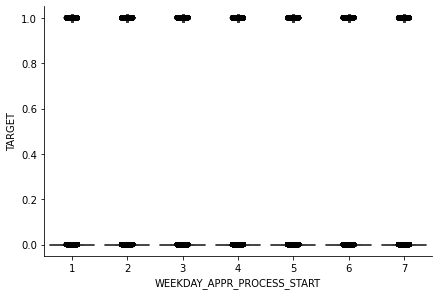

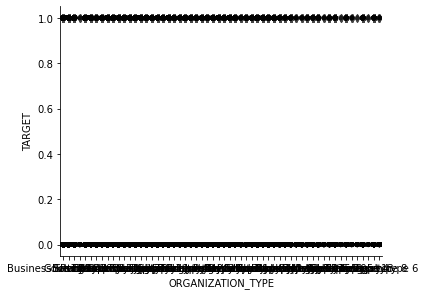

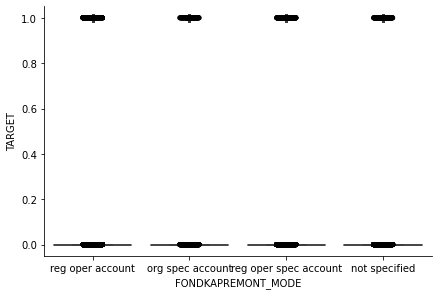

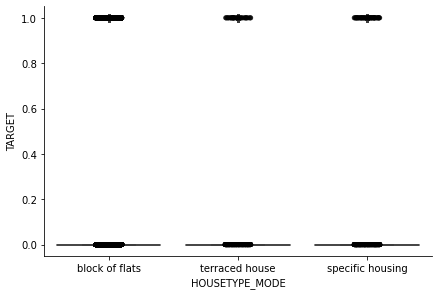

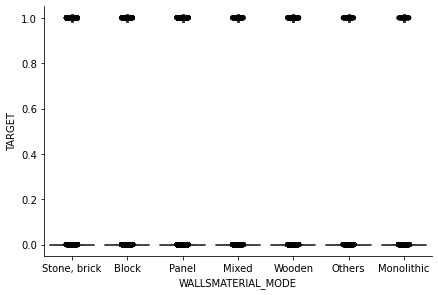

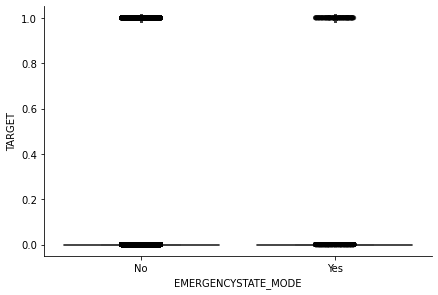

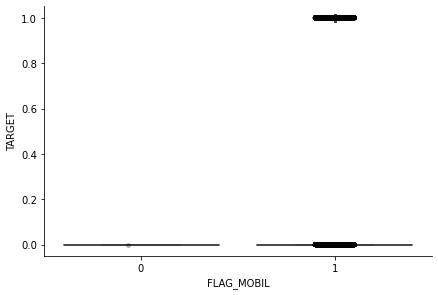

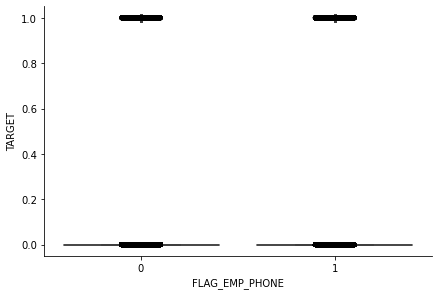

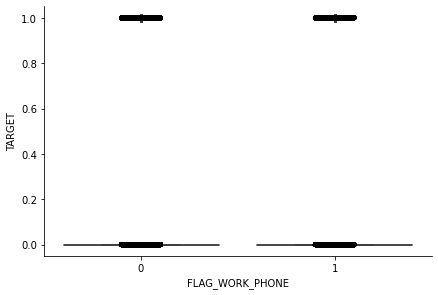

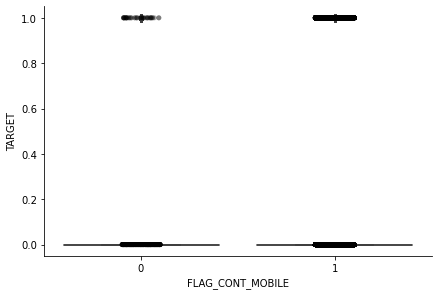

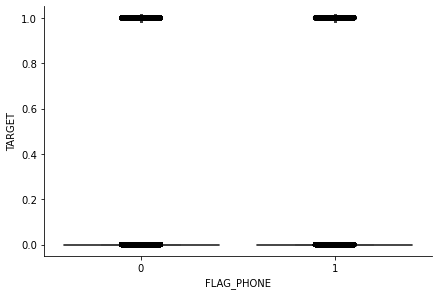

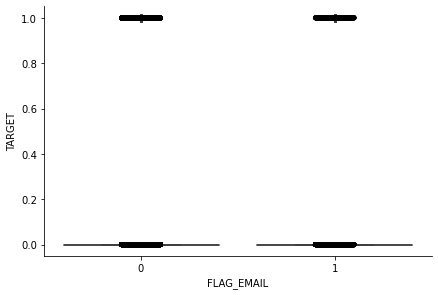

In [68]:
for var in otras:
    sns.catplot(x=var, y = 'TARGET', data=data, kind="box", height=4, aspect=1.5)
    sns.stripplot(x=var, y= 'TARGET', data=data, jitter=0.1, alpha=0.3,color='k')
    plt.show()